# FOOOF 

## 0.Loading packages, defining paths

In [1]:
# Importing Python and external packages


import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import fooof

import scipy
import scipy.io as sio
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz
from scipy import stats

import seaborn as sns
import pingouin as pg
import itertools
from itertools import combinations
from statannotations.Annotator import Annotator
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# import openpyxl
# from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv

#mne
import mne_bids
import mne
from mne.time_frequency import tfr_morlet 


# TODO: add README file: 
# pip install pingouin
# pip install statannotations
         

Import PyPerceive (has already been installed into the environment bssu)


In [2]:
import py_perceive

Load PyPerceive

In [3]:
from py_perceive.PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)

import py_perceive.PerceiveImport.methods.load_rawfile as load_rawfile
import py_perceive.PerceiveImport.methods.find_folders as find_folders
import py_perceive.PerceiveImport.methods.metadata_helpers as metaHelpers


importlib.reload(main_class)
importlib.reload(session_class)
importlib.reload(task_class)
importlib.reload(condition_class)
importlib.reload(contact_class)
importlib.reload(metadata_class)
importlib.reload(modality_class)
importlib.reload(load_rawfile)
importlib.reload(find_folders)
importlib.reload(run_class)
importlib.reload(metaHelpers)

<module 'py_perceive.PerceiveImport.methods.metadata_helpers' from 'C:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\src\\py_perceive\\PerceiveImport\\methods\\metadata_helpers.py'>

Import Gunnar`s meet Toolbox

In [4]:
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'Longterm_beta_project','Code', 'meet')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

import meet as meet

Set Path back to BetaSenSightLongterm Repo

In [5]:
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'Longterm_beta_project','Code', 'BetaSenSightLongterm')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Code\\BetaSenSightLongterm'

Load analysis functions

In [158]:
# tfr, processing
import src.bssu.tfr.BSSuPsd as BSSuPsd
import src.bssu.tfr.FastFourierPSD as FFpsd
import src.bssu.tfr.time_frequency_beta_erd_fooof_fit as tfr_fooof
import src.bssu.tfr.fooof_fit as fooof_fit

# bipolar Channel Analysis
import src.bssu.bipolar.power_spectra_plots as power_spectra_plots
import src.bssu.bipolar.PeakFrequencies_PSD as PeakFrequency_psd
import src.bssu.bipolar.BIP_channelGroups as BIP_channelGroups
import src.bssu.bipolar.BIP_perChannelAnalysis as BIP_perChannel


# monopolar Referencing
import src.bssu.monopolar.MonoRef_JLB as MonoRefJLB
import src.bssu.monopolar.GroupMonopolarPSD as groupMonopol

# Ranking Order
import src.bssu.ranking.HighestRankedChannelPSD as highestRank
import src.bssu.ranking.monopolPSDaverage_withinSubject as PSDaverageMonopol
import src.bssu.ranking.BIPchannelGroups_ranks as BIP_ranks
import src.bssu.ranking.Permutation_rankings as Permute_ranks


# Clinical stimulation parameters
import src.bssu.stimulation.activeStimulationContacts as activeStimContacts

# utility functions
import src.bssu.utils.loadResults as loadResults
import src.bssu.utils.find_folders as find_folders
import src.bssu.utils.writeGroupDataframes as writeGroupDF

# import Classes
from src.bssu.classes import (metadataAnalysis_class, mainAnalysis_class, sessionAnalysis_class, 
                              channelAnalysis_class, featureAnalysis_class, frequencyBand_class)

# import mni coordinates
import src.bssu.mni.load_rotated_coordinates as load_mni


importlib.reload(BSSuPsd)
importlib.reload(MonoRefJLB)
importlib.reload(loadResults)
importlib.reload(highestRank)
importlib.reload(groupMonopol)
importlib.reload(PSDaverageMonopol)
importlib.reload(FFpsd)
importlib.reload(find_folders)
importlib.reload(metadataAnalysis_class)
importlib.reload(mainAnalysis_class)
importlib.reload(sessionAnalysis_class)
importlib.reload(channelAnalysis_class)
importlib.reload(featureAnalysis_class)
importlib.reload(frequencyBand_class)
importlib.reload(PeakFrequency_psd)
importlib.reload(power_spectra_plots)
importlib.reload(BIP_channelGroups)
importlib.reload(BIP_ranks)
importlib.reload(activeStimContacts)
importlib.reload(Permute_ranks)
importlib.reload(BIP_perChannel)
importlib.reload(load_mni)
importlib.reload(writeGroupDF)
importlib.reload(tfr_fooof)
importlib.reload(fooof_fit)

<module 'src.bssu.tfr.fooof_fit' from 'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Code\\BetaSenSightLongterm\\src\\bssu\\tfr\\fooof_fit.py'>

In [7]:
# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

Load one Json file with fooof results: filename "fooof_model_sub{subject}.json"

In [49]:
fooof_result = loadResults.load_fooof_json(subject="041")
fooof_result.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
041_Right_fu3m_03,041_Right,fu3m,03,0.083630,0.985704,1.561619,1.176847,"[0.1434507861, 0.1434616289, 0.2310460222, 0.4...","[1.1809734375, 0.7188231982, 0.4673926995, 0.3...","[0.0041264386, 0.0120702994, 0.035627221, 0.09...",6,"[8.6527848434, 0.8655230432, 4.4014748425]","[16.5972543715, 1.7641152148, 3.5159319744]","[22.8707472523, 1.0902834376, 12.451218502]","[16.5972543715, 1.7641152148, 3.5159319744]","[None, None, None]"
041_Right_fu3m_13,041_Right,fu3m,13,0.087034,0.984410,1.542859,1.219146,"[0.0014966467, 0.0034970748, 0.0132131805, 0.0...","[1.2191848632, 0.7549657675, 0.4848975664, 0.3...","[3.92408e-05, 0.0002670896, 0.0018829346, 0.01...",6,"[9.2228635269, 0.7750920167, 3.5661921328]","[16.6637349535, 1.9431987598, 3.5194490319]","[21.4517895001, 1.2124092309, 8.7810354736]","[16.6637349535, 1.9431987598, 3.5194490319]","[None, None, None]"
041_Right_fu3m_02,041_Right,fu3m,02,0.078585,0.983934,1.650680,1.416945,"[0.0003755294, 0.0008781688, 0.002947723, 0.01...","[1.4169509716, 0.9200864274, 0.6296707249, 0.4...","[6.2443e-06, 4.58457e-05, 0.000300435, 0.00260...",6,"[11.6986796931, 0.4959935254, 4.5213265049]","[16.9452343388, 1.512251989, 3.7843142777]","[22.5857602629, 0.9716451979, 4.323020515]","[16.9452343388, 1.512251989, 3.7843142777]","[None, None, None]"
041_Right_fu3m_12,041_Right,fu3m,12,0.096005,0.979059,1.571656,1.270386,"[0.4947651687, 0.2513027175, 0.1972063242, 0.1...","[1.2817644835, 0.8143369393, 0.5456101095, 0.3...","[0.0113787857, 0.0170667163, 0.0250946979, 0.0...",3,"[None, None, None]","[16.8570606362, 1.7909666773, 2.9442460814]","[21.8982121027, 0.9143250153, 14.1882690798]","[16.8570606362, 1.7909666773, 2.9442460814]","[None, None, None]"
041_Right_fu3m_01,041_Right,fu3m,01,0.066896,0.980436,1.417750,0.868963,"[5.2291e-06, 1.17054e-05, 3.53715e-05, 0.00011...","[0.8689634247, 0.4421796414, 0.1925342618, 0.0...","[3.071e-07, 1.8365e-06, 9.8607e-06, 4.73243e-0...",6,"[None, None, None]","[17.2242895056, 1.0397572496, 5.9137272503]","[24.0124432688, 0.7189069359, 2.5841922492]","[17.2242895056, 1.0397572496, 5.9137272503]","[None, None, None]"


Write a group Dataframe concatenating all DF from each subject folder

In [11]:
fooof_group_result = writeGroupDF.write_fooof_group_json(
    incl_sub=["017", "019", "021", "024", "025", "026", "028", "029", "030", "031", "032", "033", "038", 
              "041", "045", "059", "060", "061", "062", "063"]
)

# TODO: after running fooof fit add subjects 040, 041, 060

In [15]:
fooof_group_result.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
0,017_Right,fu3m,03,0.067918,0.984748,1.604428,1.193436,"[0.1656846121, 0.1649261572, 0.2233027721, 0.3...","[1.1980212709, 0.7241873517, 0.4627028941, 0.3...","[0.0045849614, 0.0137320197, 0.0347733225, 0.0...",4,"[8.0361304032, 0.2920797265, 4.8819935856]","[None, None, None]","[28.9598253493, 0.5980392495, 7.9884764248]","[28.9598253493, 0.5980392495, 7.9884764248]","[None, None, None]"
1,017_Right,fu3m,13,0.065586,0.981937,1.434853,0.962182,"[0.00025127, 0.000170312, 0.0001713231, 0.0002...","[0.9621936864, 0.5302699046, 0.2776223402, 0.0...","[1.19052e-05, 2.18158e-05, 3.92643e-05, 6.9409...",6,"[None, None, None]","[13.6525290401, 0.2751629141, 3.0043817259]","[29.1048971253, 0.9469996841, 2.8278507671]","[29.1048971253, 0.9469996841, 2.8278507671]","[None, None, None]"
2,017_Right,fu3m,02,0.103924,0.967577,1.543910,1.189600,"[0.109168079, 0.1121990258, 0.1548672324, 0.22...","[1.1926531892, 0.7339231906, 0.4760453097, 0.3...","[0.0030531805, 0.0090862654, 0.02307736, 0.050...",2,"[8.3809412329, 0.2263361313, 5.0237181784]","[None, None, None]","[29.09726726, 0.9610582984, 9.2634518255]","[29.09726726, 0.9610582984, 9.2634518255]","[None, None, None]"
3,017_Right,fu3m,12,0.075776,0.975321,1.304337,0.703128,"[0.0, 0.0, 0.0, 1e-10, 2e-10, 7e-10, 1.8e-09, ...","[0.7031279556, 0.3104833187, 0.08080093, -0.08...","[0.0, 0.0, 0.0, 0.0, 2e-10, 6e-10, 2e-09, 6.7e...",5,"[None, None, None]","[None, None, None]","[29.4862292984, 1.0958098075, 5.0314063169]","[29.4862292984, 1.0958098075, 5.0314063169]","[63.6509137528, 0.2746917897, 2.0]"
4,017_Right,fu3m,01,0.064701,0.983808,1.540660,1.072680,"[8.3557e-06, 0.0002934974, 0.0064128567, 0.068...","[1.0726801317, 0.6089264433, 0.3388765877, 0.1...","[3.07e-07, 3.13674e-05, 0.0012781982, 0.020770...",6,"[None, None, None]","[None, None, None]","[33.2211166882, 0.4390133671, 2.0]","[33.2211166882, 0.4390133671, 2.0]","[63.7733341896, 0.1903054915, 10.556379168]"


In [46]:
fooof_model = fooof_fit.fooof_fit_power_spectra(
    incl_sub=["017", "019", "021", "024", "025", "026", "028", "029", "030", "031", "032", "033", "038"]
)

# runtime around 15 minutes :D

## 1. fit a FOOOF model to find the highest Peak in freq bands: alpha, low beta, high beta, gamma

Use automatized code to fit FOOOF model on each channel of all patients

In [14]:
fooof_model = fooof_fit.fooof_fit_power_spectra(
    ["041", "045", "059", "060", "061", "062", "063"]
)

# TODO: run for subjects: 040 (first solve channel name issue), 047 (metadata postop), 050 (protocol info?)

Load single power_spectra

In [8]:
# Import required code for visualizing example models
from fooof import FOOOF
from fooof.sim.utils import set_random_seed
from fooof.plts.spectra import plot_spectrum
from fooof.plts.annotate import plot_annotated_model

# Import Bands object, to manage frequency band definitions
from fooof.bands import Bands

# Import utility functions that manage & manipulate FOOOF objects
from fooof.objs.utils import average_fg, combine_fooofs, compare_info

c:\Users\jebe12\anaconda3\envs\bssu\lib\site-packages\outdated\utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [15]:
data_power_spectrum = mainAnalysis_class.MainClass(
        sub="030",
        hemisphere="Right",
        filter="unfiltered",
        result="PowerSpectrum",
        incl_session=["postop", "fu3m", "fu12m", "fu18m"],
        pickChannels=['03', '13', '02', '12', '01', '23', 
                        '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
                        '1A2A', '1B2B', '1C2C'],
        normalization=["rawPsd"],
        feature=["frequency", "time_sectors", "rawPsd", "SEM_rawPsd"]
    )

subject_figures_path = find_folders.get_local_path(folder="figures", sub="030")

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 95 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          0.9360, 1.5602                                          
                                                                                                  
                                       6 peaks were found:                                        
          

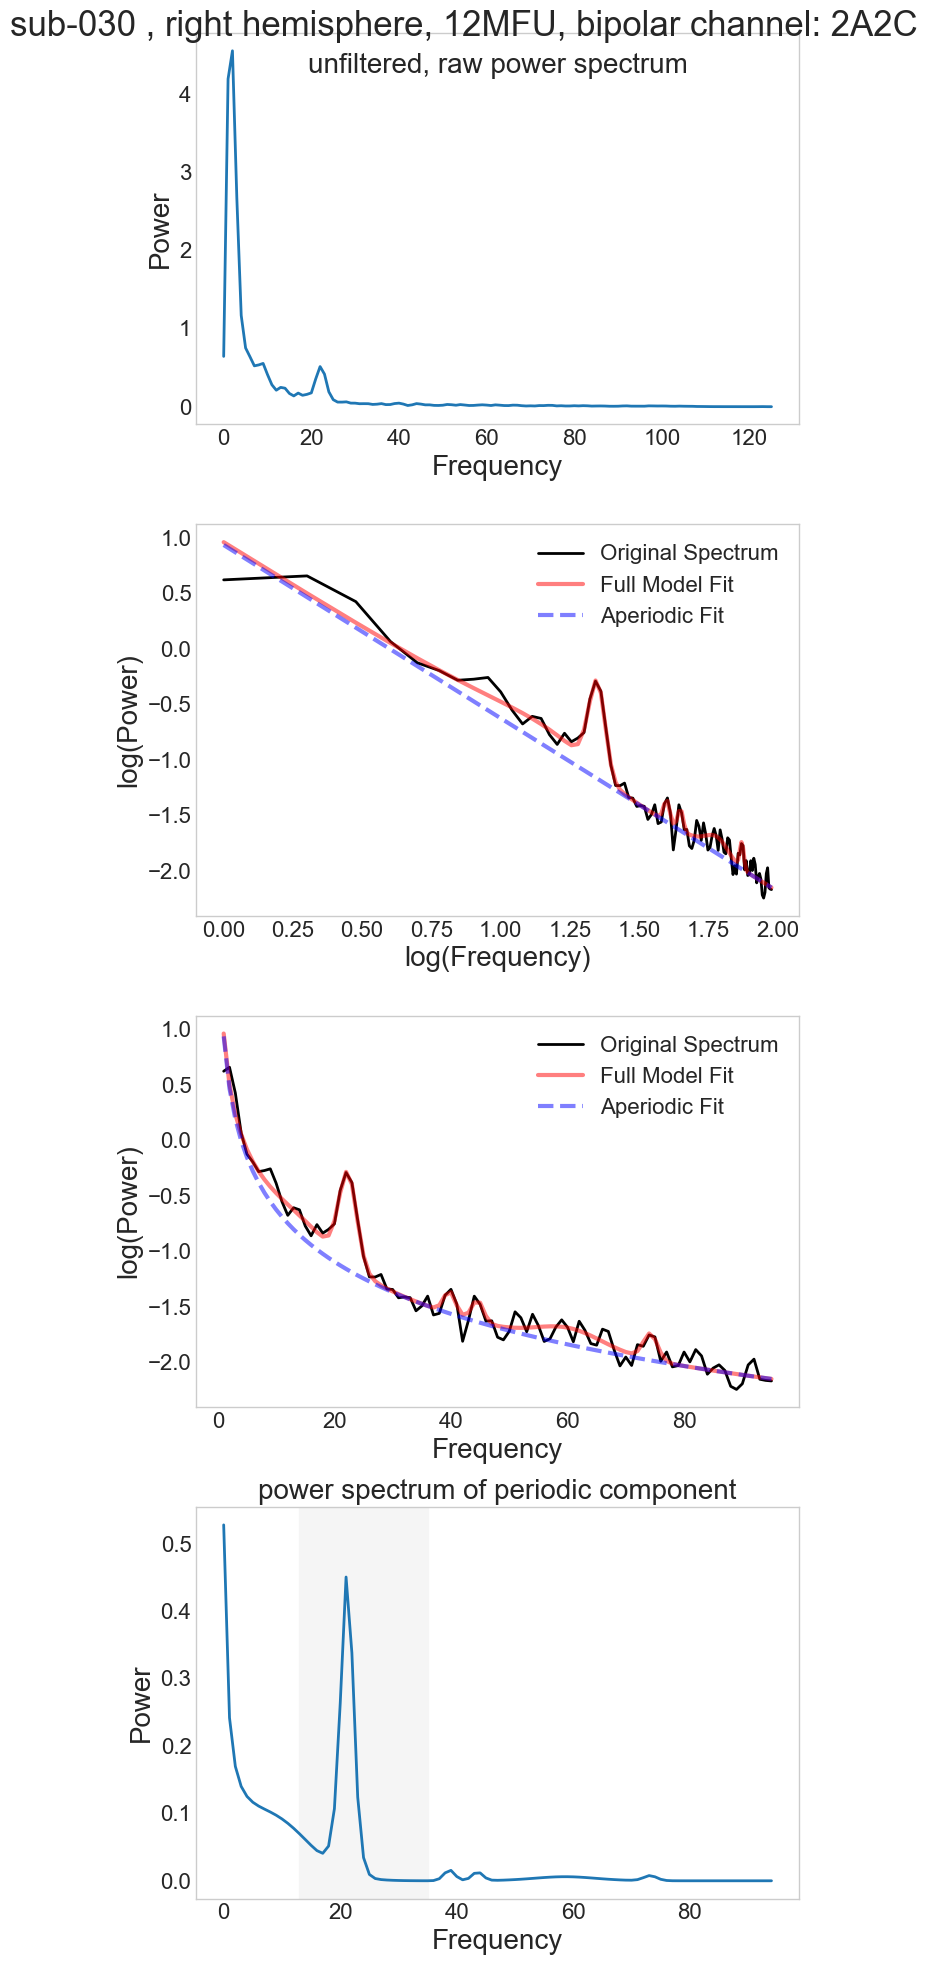

In [17]:
# save power spectrum and frequencies as arrays

power_spectrum = np.array(data_power_spectrum.fu12m.BIP_2A2C.rawPsd.data)
freqs = np.array(data_power_spectrum.fu12m.BIP_2A2C.frequency.data)
freq_range = [1, 95] # better fit broad frequency band


############ SET PLOT LAYOUT ############
fig, ax = plt.subplots(4,1, figsize=(7,20))

# Plot the unfiltered Power spectrum in first ax
plot_spectrum(freqs, power_spectrum, log_freqs=False, log_powers=False,
                  ax=ax[0])
# ax[0].plot(freqs, power_spectrum)
ax[0].grid(False)


############ SET FOOOF MODEL ############
model = fooof.FOOOF(
        peak_width_limits=[2, 15.0], # must be a list, low limit should be more than twice as frequency resolution, usually not more than 15Hz bw
        max_n_peaks=6, # 4 sometimes misses important peaks, 5 better even though there might be more false positives in high frequencies
        min_peak_height=0.2, # 0.2 detects false positives in gamma but better than 0.35 missing relevant peaks in low frequencies
        peak_threshold=2.0, # default 2.0, lower if necessary to detect peaks more sensitively
        aperiodic_mode="fixed", # fitting without knee component, because there are no knees found so far in the STN
        verbose=True,
    )

# always fit a large Frequency band, later you can select Peaks within specific freq bands
model.fit(freqs=freqs, power_spectrum=power_spectrum, freq_range=freq_range)

# Plot an example power spectrum, with a model fit in second ax
# model.plot(plot_peaks='shade', peak_kwargs={'color' : 'green'}, ax=ax[1])
model.plot(ax=ax[1], plt_log=True) # Moritz wanted log True for plotting
model.plot(ax=ax[2], plt_log=False) # To see the periodic component better log False
ax[1].grid(False)
ax[2].grid(False)

# plot the fooof power spectrum of the periodic component
fooof_power_spectrum = 10**(model._peak_fit + model._ap_fit) - (10**model._ap_fit)
# fooof_power_spectrum = model.power_spectrum

#ax[3].plot(fooof_power_spectrum)
plot_spectrum(np.arange(len(fooof_power_spectrum)), fooof_power_spectrum, log_freqs=False, log_powers=False,
                  ax=ax[3])

fig.suptitle(f"sub-030 , right hemisphere, 12MFU, bipolar channel: 2A2C",
                                        fontsize=25)

ax[0].set_title("unfiltered, raw power spectrum", fontsize=20, y=0.97, pad=-20)
ax[3].set_title("power spectrum of periodic component", fontsize=20)

# mark beta band
x1 = 13
x2 = 35
ax[3].axvspan(x1, x2, color="whitesmoke")
ax[3].grid(False)


fig.tight_layout()

fig.savefig(subject_figures_path + f"\\fooof_model_sub030_Right_fu12m_2A2C.svg", 
                    bbox_inches = "tight", format="svg")

# print the result in third ax
model.print_results()

############ SAVE APERIODIC PARAMETERS ############
# goodness of fit
err = model.get_params('error')
r_sq = model.r_squared_

# aperiodic components
exp = model.get_params('aperiodic_params', 'exponent')
offset = model.get_params('aperiodic_params', 'offset')


############ SAVE ALL PEAKS IN ALPHA; HIGH AND LOW BETA ############

number_peaks = model.n_peaks_

# select the highest Peak within alpha, low beta, high beta and gamma band
alpha_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(8.0, 12.0),
                    select_highest=True,
                    attribute="peak_params",
                )

low_beta_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(13.0, 20.0),
                    select_highest=True,
                    attribute="peak_params",
                )

high_beta_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(21.0, 35.0),
                    select_highest=True,
                    attribute="peak_params",
                )

beta_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(13.0, 35.0),
                    select_highest=True,
                    attribute="peak_params",
                )

gamma_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(60.0, 90.0),
                    select_highest=True,
                    attribute="peak_params",
                )


# output beta_peaks: beta_peaks[0] = first Peak in beta range
# beta_peaks[0] = CF center frequency of first Peak
# beta_peaks[1] = Power of first Peak
# beta_peaks[2] = BandWidth of first Peak

cfs = model.get_params('peak_params', 'CF')

# Print out a custom parameter report
template = ("With an error level of {error:1.2f}, FOOOF fit an exponent "
            "of {exponent:1.2f} and peaks of {cfs:s} Hz.")

# print(template.format(error=err, exponent=exp,
#                         cfs=' & '.join(map(str, [round(cf, 2) for cf in cfs]))))

# Aperiodic parameters
print('Aperiodic parameters (offset, exponent): \n', model.aperiodic_params_, '\n')

# Peak parameters
print('Peak parameters: \n', model.peak_params_, '\n')

# Goodness of fit measures
print('Goodness of fit:')
print(' Error - ', model.error_)
print(' R^2   - ', model.r_squared_, '\n')

# Check how many peaks were fit
print('Number of fit peaks: \n', model.n_peaks_)


In [102]:
len(fooof_power_spectrum)

95

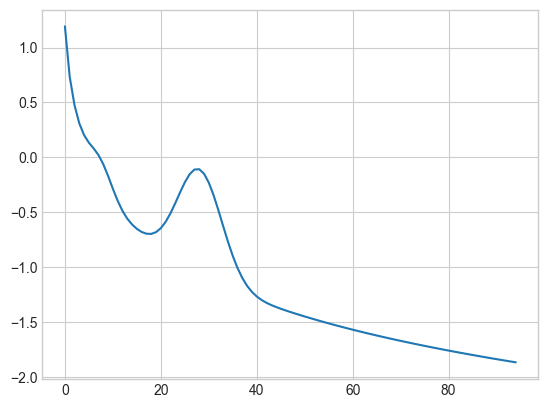

In [17]:
fooof_spectrum = model._peak_fit + model._ap_fit

plt.plot(fooof_spectrum)

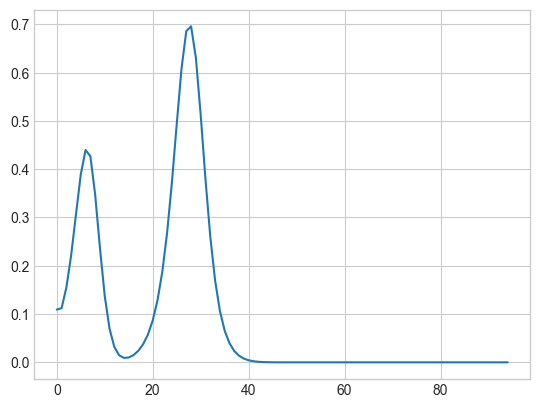

In [12]:
fooof_power_spectrum = 10**(model._peak_fit + model._ap_fit) - (10**model._ap_fit)

plt.plot(fooof_power_spectrum)

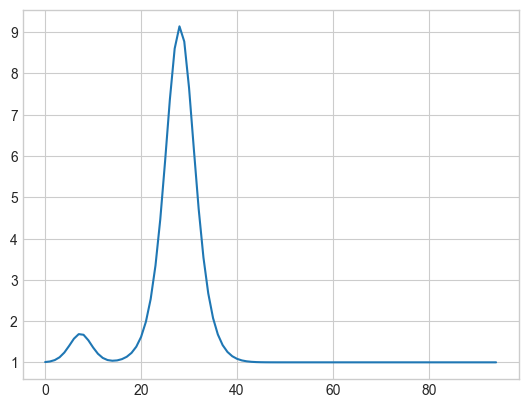

In [20]:
fooof_spectrum = model._peak_fit

plt.plot(fooof_spectrum)

In [93]:
# Extract a model parameter with `get_params`
err = model.get_params('error')

# Extract parameters, indicating sub-selections of parameters
exp = model.get_params('aperiodic_params', 'exponent')
cfs = model.get_params('peak_params', 'CF')

# Print out a custom parameter report
template = ("With an error level of {error:1.2f}, FOOOF fit an exponent "
            "of {exponent:1.2f} and peaks of {cfs:s} Hz.")
print(template.format(error=err, exponent=exp,
                      cfs=' & '.join(map(str, [round(cf, 2) for cf in cfs]))))

With an error level of 0.07, FOOOF fit an exponent of 1.40 and peaks of 15.05 & 31.25 & 45.42 Hz.


In [40]:
# Richard's method
fit_model = tfr_fooof.fit_model(
    freqs=freqs,
    power_spectrum=power_spectrum,
    fit_knee=False, 
    ax=ax,
    )


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 125 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          1.9278, 2.4994                                          
                                                                                                  
                             

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 5 - 95 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          1.0961, 1.6207                                          
                                                                                                  
                                       4 peaks were found:                                        
          

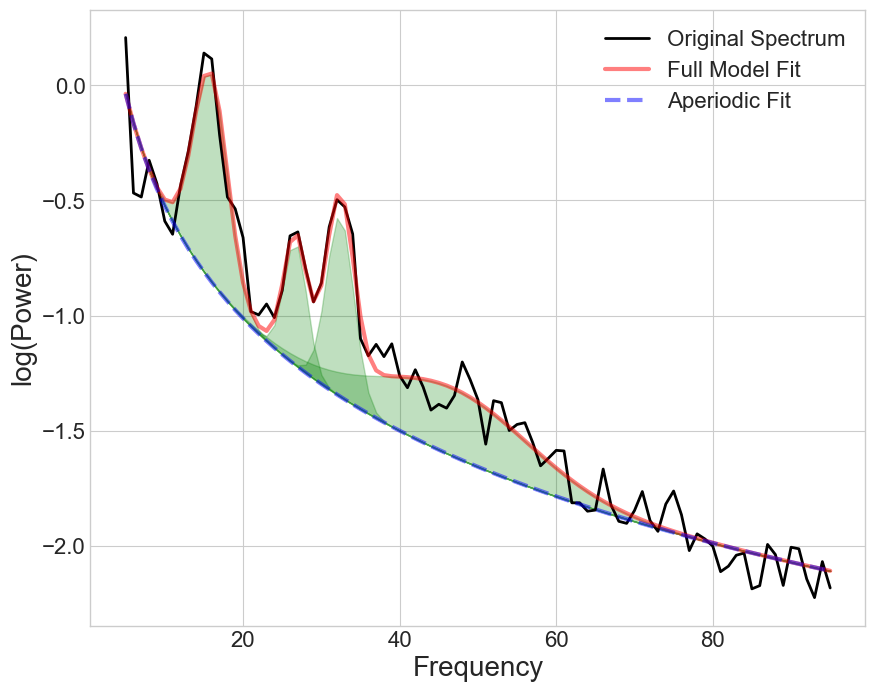

In [71]:
model = fooof.FOOOF(
        peak_width_limits=(2, 20.0),
        max_n_peaks=4,
        min_peak_height=0.0,
        peak_threshold=1.0,
        aperiodic_mode="fixed",
        verbose=True,
    )

# always fit a large Frequency band, later you can select Peaks within specific freq bands
freq_range = [5, 95]
model.fit(freqs=freqs, power_spectrum=power_spectrum, freq_range=freq_range)

# print the result
model.print_results()

# plot the Power Spectrum without shade
#model.report(freqs, power_spectrum, freq_range)

# Plot an example power spectrum, with a model fit
model.plot(plot_peaks='shade', peak_kwargs={'color' : 'green'})

In [72]:
beta_peaks = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(13.0, 35.0),
                    select_highest=False,
                    attribute="peak_params",
                )

# output beta_peaks: beta_peaks[0] = first Peak in beta range
# beta_peaks[0][0] = CF center frequency of first Peak
# beta_peaks[0][1] = Power of first Peak
# beta_peaks[0][2] = BandWidth of first Peak

In [73]:
peak_1 = beta_peaks[0]
peak_1

array([15.80561099,  0.90660617,  4.40086413])

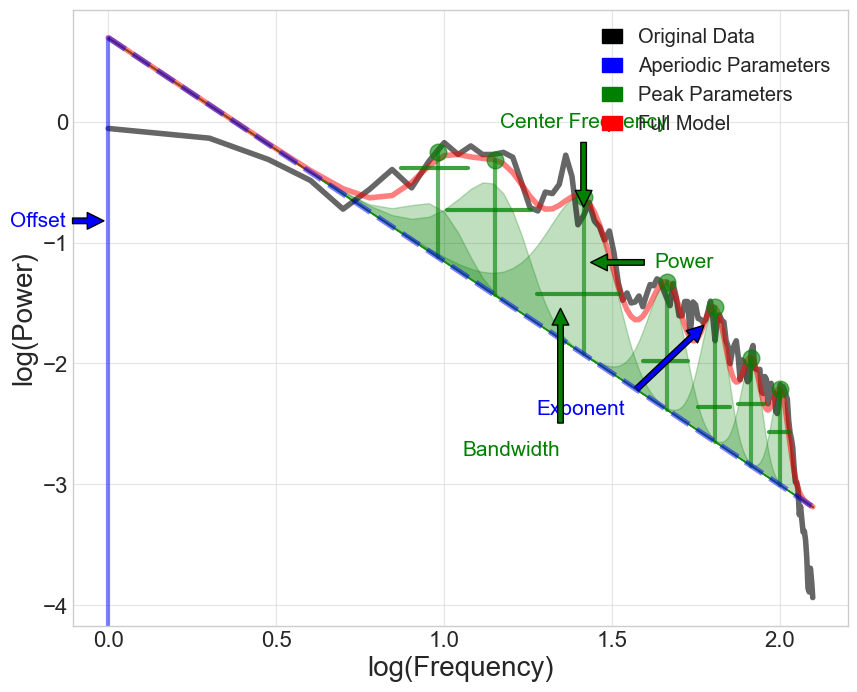

In [22]:
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm1, plt_log=True)


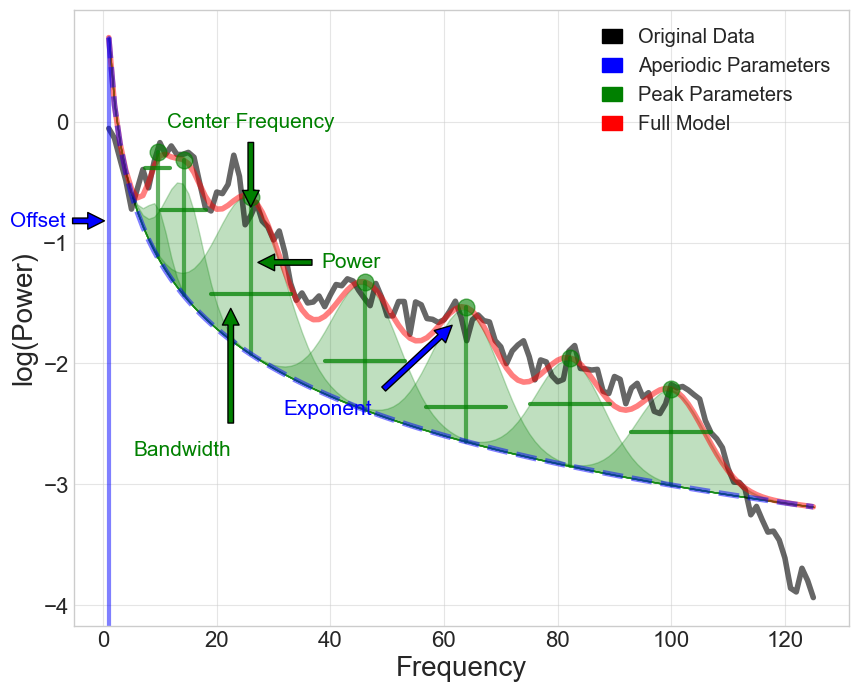

In [23]:
# plotted in log-log, here the aperiodic component is a straight line, hallmark of 1/f activity
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm1)

## 2. Number of Peaks in frequency bands alpha, low beta, high beta, beta and gamma

In [55]:
fooof_group_result = loadResults.load_group_fooof_result()

In [56]:
fooof_group_result.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
0,017_Right,fu3m,03,0.067918,0.984748,1.604428,1.193436,"[0.1656846121, 0.1649261572, 0.2233027721, 0.3...","[1.1980212709, 0.7241873517, 0.4627028941, 0.3...","[0.0045849614, 0.0137320197, 0.0347733225, 0.0...",4,"[8.0361304032, 0.2920797265, 4.8819935856]","[None, None, None]","[28.9598253493, 0.5980392495, 7.9884764248]","[28.9598253493, 0.5980392495, 7.9884764248]","[None, None, None]"
1,017_Right,fu3m,13,0.065586,0.981937,1.434853,0.962182,"[0.00025127, 0.000170312, 0.0001713231, 0.0002...","[0.9621936864, 0.5302699046, 0.2776223402, 0.0...","[1.19052e-05, 2.18158e-05, 3.92643e-05, 6.9409...",6,"[None, None, None]","[13.6525290401, 0.2751629141, 3.0043817259]","[29.1048971253, 0.9469996841, 2.8278507671]","[29.1048971253, 0.9469996841, 2.8278507671]","[None, None, None]"
2,017_Right,fu3m,02,0.103924,0.967577,1.543910,1.189600,"[0.109168079, 0.1121990258, 0.1548672324, 0.22...","[1.1926531892, 0.7339231906, 0.4760453097, 0.3...","[0.0030531805, 0.0090862654, 0.02307736, 0.050...",2,"[8.3809412329, 0.2263361313, 5.0237181784]","[None, None, None]","[29.09726726, 0.9610582984, 9.2634518255]","[29.09726726, 0.9610582984, 9.2634518255]","[None, None, None]"
3,017_Right,fu3m,12,0.075776,0.975321,1.304337,0.703128,"[0.0, 0.0, 0.0, 1e-10, 2e-10, 7e-10, 1.8e-09, ...","[0.7031279556, 0.3104833187, 0.08080093, -0.08...","[0.0, 0.0, 0.0, 0.0, 2e-10, 6e-10, 2e-09, 6.7e...",5,"[None, None, None]","[None, None, None]","[29.4862292984, 1.0958098075, 5.0314063169]","[29.4862292984, 1.0958098075, 5.0314063169]","[63.6509137528, 0.2746917897, 2.0]"
4,017_Right,fu3m,01,0.064701,0.983808,1.540660,1.072680,"[8.3557e-06, 0.0002934974, 0.0064128567, 0.068...","[1.0726801317, 0.6089264433, 0.3388765877, 0.1...","[3.07e-07, 3.13674e-05, 0.0012781982, 0.020770...",6,"[None, None, None]","[None, None, None]","[33.2211166882, 0.4390133671, 2.0]","[33.2211166882, 0.4390133671, 2.0]","[63.7733341896, 0.1903054915, 10.556379168]"


How many channels with Peaks are found per session?

In [57]:
peaks_per_session = fooof_fit.fooof_peaks_per_session()

file:  fooof_peaks_per_session.pickle 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [58]:
peaks_per_session.head()

,subject_hemisphere,session,frequency_band,total_chans_number,number_chans_with_peaks,percentage_chans_with_peaks
017_Right_fu3m_alpha,017_Right,fu3m,alpha,15,4,0.266667
017_Right_fu3m_low_beta,017_Right,fu3m,low_beta,15,4,0.266667
017_Right_fu3m_high_beta,017_Right,fu3m,high_beta,15,15,1.0
017_Right_fu3m_beta,017_Right,fu3m,beta,15,15,1.0
017_Right_fu3m_gamma,017_Right,fu3m,gamma,15,7,0.466667


In [33]:
session_df = peaks_per_session.loc[peaks_per_session.session=="postop"]
session_beta_df = session_df.loc[session_df.frequency_band=="beta"]
session_beta_df

,subject_hemisphere,session,frequency_band,total_chans_number,number_chans_with_peaks,percentage_chans_with_peaks
024_Right_postop_beta,024_Right,postop,beta,15,13,0.866667
024_Left_postop_beta,024_Left,postop,beta,15,14,0.933333
025_Right_postop_beta,025_Right,postop,beta,15,14,0.933333
025_Left_postop_beta,025_Left,postop,beta,15,14,0.933333
026_Right_postop_beta,026_Right,postop,beta,15,15,1.0
026_Left_postop_beta,026_Left,postop,beta,15,14,0.933333
028_Right_postop_beta,028_Right,postop,beta,15,8,0.533333
028_Left_postop_beta,028_Left,postop,beta,15,7,0.466667
029_Right_postop_beta,029_Right,postop,beta,15,10,0.666667
029_Left_postop_beta,029_Left,postop,beta,15,7,0.466667


In [34]:
freq_bands = ["alpha", "low_beta", "high_beta", "beta", "gamma"]
sessions = ["postop", "fu3m", "fu12m", "fu18m"]

fig = plt.figure()
font = {"size": 14}

perc_chans_with_peaks_data = {}

for ses in sessions:

    # get the dataframes for each session seperately
    fooof_session = peaks_per_session.loc[(peaks_per_session["session"]==ses)]

    for freq in freq_bands:

        # get dataframes for each frequency
        freq_session_df = fooof_session.loc[fooof_session.frequency_band==freq]

        mean_percentage_chans_with_peaks = np.mean(freq_session_df.percentage_chans_with_peaks.values)
        std_percentage_chans_with_peaks = np.std(freq_session_df.percentage_chans_with_peaks.values)

        perc_chans_with_peaks_data[f"{ses}_{freq}"] = [ses, freq, mean_percentage_chans_with_peaks, std_percentage_chans_with_peaks]


perc_chans_with_peaks_df = pd.DataFrame(perc_chans_with_peaks_data)
perc_chans_with_peaks_df.rename(index={
    0: "session",
    1: "frequency_band",
    2: "mean_percentage_chans_with_peaks",
    3: "std_percentage_chans_with_peaks",
}, inplace=True)
perc_chans_with_peaks_df = perc_chans_with_peaks_df.transpose()



<Figure size 640x480 with 0 Axes>

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:3.999e-01 U_stat=2.395e+02
3 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:8.906e-01 U_stat=3.155e+02
12 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:3.475e-01 U_stat=8.650e+01
0 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:6.484e-01 U_stat=2.015e+02
3 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:2.578e-01 U_stat=1.055e+02
0 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:9.733e-02 U_stat=6.200e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.872e-01 U_stat=2.170e+02
3 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:6.431e-01 U_stat=3

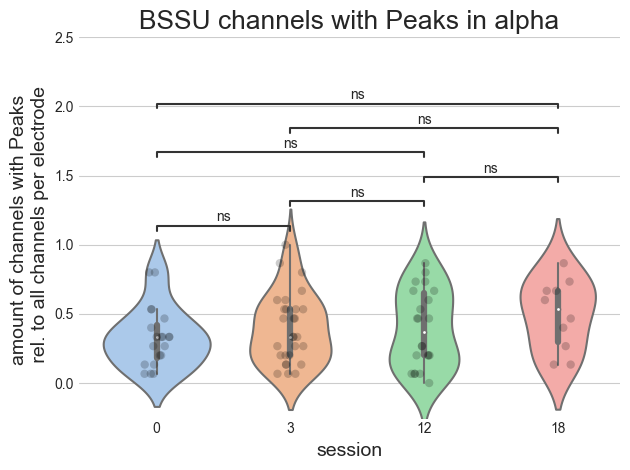

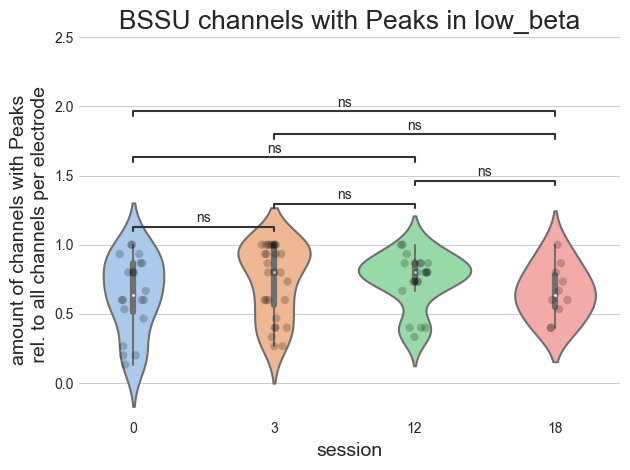

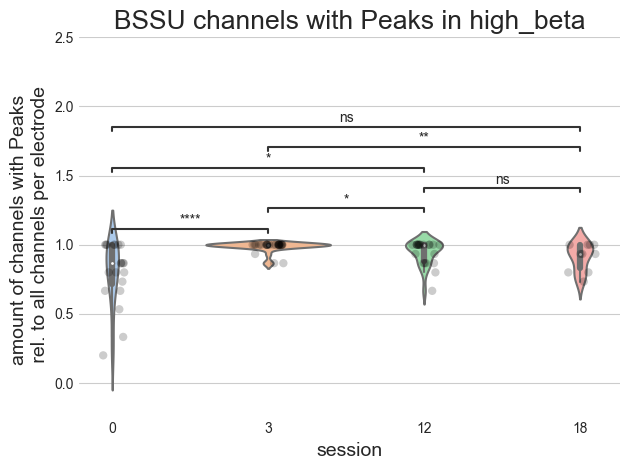

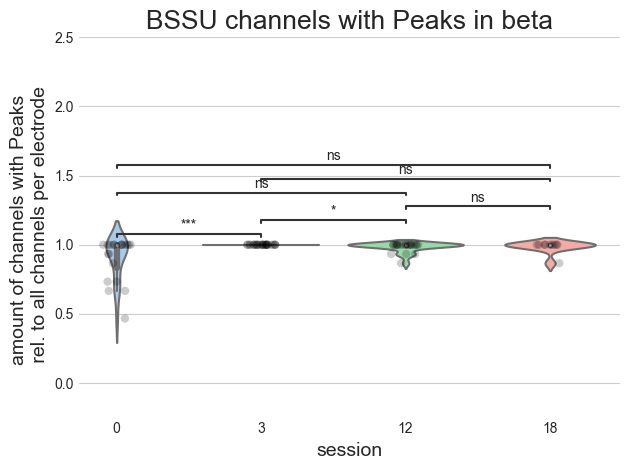

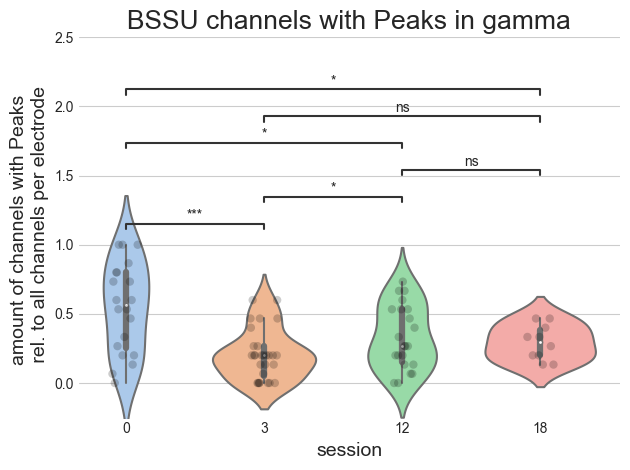

In [62]:
fooof_peaks = fooof_fit.fooof_peaks_in_freq_band_stats()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:3.691e-01 U_stat=2.510e+02
3 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:4.030e-01 U_stat=2.745e+02
12 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:1.211e-01 U_stat=6.550e+01
0 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:1.201e-01 U_stat=2.320e+02
3 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:3.435e-01 U_stat=9.500e+01
0 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:9.034e-01 U_stat=8.700e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:9.085e-01 U_stat=2.110e+02
3 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:4.776e-01 U_stat=2

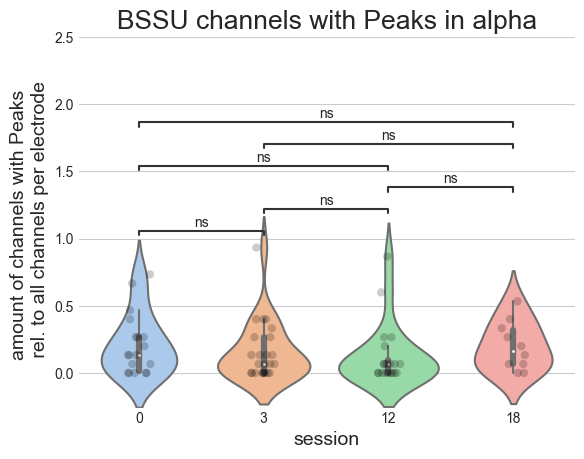

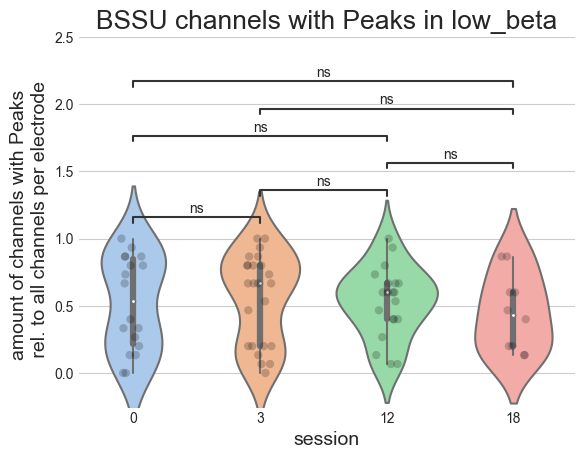

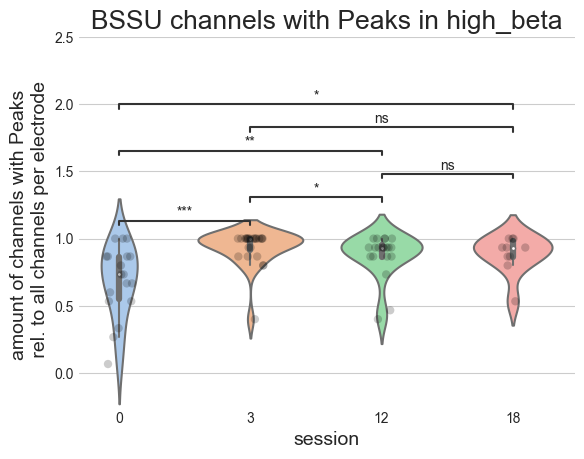

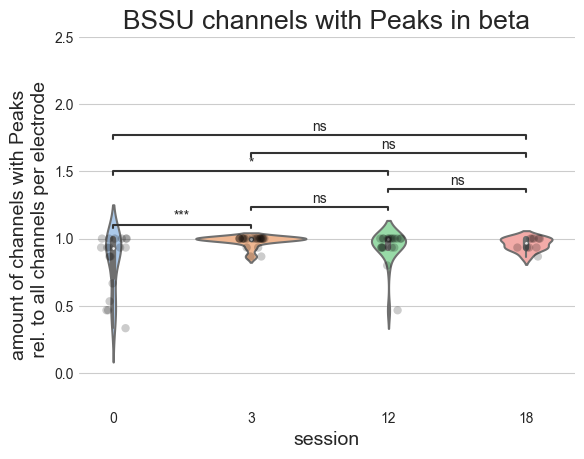

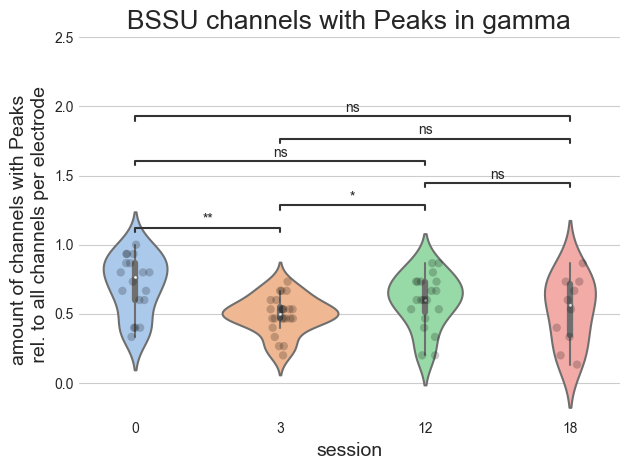

In [82]:
# plot line plot 
# cycler_colors = cycler("color", ["turquoise", "sandybrown", "plum", "cornflowerblue"])
# plt.rc('axes', prop_cycle=cycler_colors)


font = {"size": 14}

for f, freq in enumerate(freq_bands):

    freq_df = peaks_per_session.loc[peaks_per_session.frequency_band == freq]

    # replace session names by integers
    freq_df = freq_df.replace(to_replace="postop", value=0)
    freq_df = freq_df.replace(to_replace="fu3m", value=3)
    freq_df = freq_df.replace(to_replace="fu12m", value=12)
    freq_df = freq_df.replace(to_replace="fu18m", value=18)
   
    if freq=="alpha":
        color="sandybrown"
    
    elif freq=="beta":
        color="darkcyan"
    
    elif freq=="low_beta":
        color="turquoise"

    elif freq=="high_beta":
        color="cornflowerblue"
    
    elif freq=="gamma":
        color="plum"

    fig=plt.figure()
    ax=fig.add_subplot()

    sns.violinplot(data=freq_df, x="session", y="percentage_chans_with_peaks", palette="pastel", inner="box", ax=ax)

    sns.stripplot(
        data=freq_df,
        x="session",
        y="percentage_chans_with_peaks",
        ax=ax,
        size=6,
        color="black",
        alpha=0.2, # Transparency of dots
    )

    sns.despine(left=True, bottom=True) # get rid of figure frame


    # statistical test: doesn't work if groups have different sample size
    num_sessions = [0, 3, 12, 18]
    pairs = list(combinations(num_sessions, 2))

    annotator = Annotator(ax, pairs, data=freq_df, x='session', y='percentage_chans_with_peaks')
    annotator.configure(test='Mann-Whitney', text_format='star') # or ANOVA first to check if there is any difference between all groups
    annotator.apply_and_annotate()

    plt.title(f"BSSU channels with Peaks in {freq}", fontdict={"size": 19})
    plt.ylabel(f"amount of channels with Peaks \n rel. to all channels per electrode", fontdict=font)
    plt.ylim(-0.25, 2.5)
    plt.xlabel("session", fontdict=font)



# for ax in axes:
#     ax.set_ylim(-0.3, 1.3)

# axes[0].set_title("Amount of recordings with Peaks", fontdict={"size": 19})
# legend= axes[0].legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))
# legend.get_frame().set_alpha(None)
# legend.get_frame().set_facecolor("white")

# axes[2].set_ylabel("recordings with peak in frequency band \nrelative to all recordings", fontdict=font)
# axes[4].set_xlabel("session", fontdict=font)


fig.tight_layout()


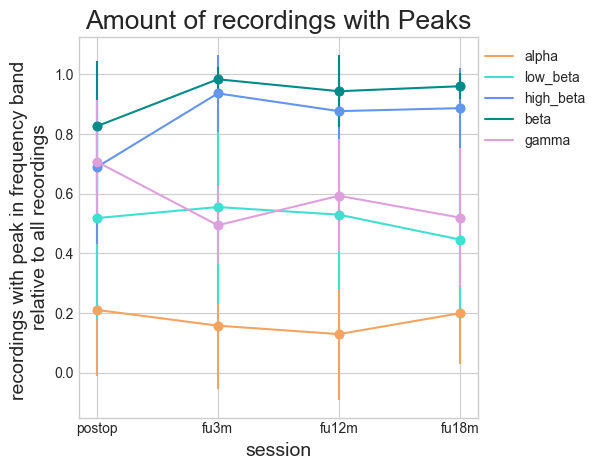

In [50]:
# plot line plot 
# cycler_colors = cycler("color", ["turquoise", "sandybrown", "plum", "cornflowerblue"])
# plt.rc('axes', prop_cycle=cycler_colors)

fig = plt.figure()

font = {"size": 14}

for freq in freq_bands:

    freq_df = perc_chans_with_peaks_df.loc[perc_chans_with_peaks_df.frequency_band == freq]
    #df_copy = freq_df.copy()

    # new column with mean-std and mean+std
    # df_copy["mean-std"] = df_copy.mean_percentage_chans_with_peaks.values - df_copy.std_percentage_chans_with_peaks.values
    # df_copy["mean+std"] = df_copy.mean_percentage_chans_with_peaks.values + df_copy.std_percentage_chans_with_peaks.values

    if freq=="alpha":
        color="sandybrown"
    
    elif freq=="beta":
        color="darkcyan"
    
    elif freq=="low_beta":
        color="turquoise"

    elif freq=="high_beta":
        color="cornflowerblue"
    
    elif freq=="gamma":
        color="plum"

    plt.plot(freq_df.session, freq_df.mean_percentage_chans_with_peaks, label=freq, color=color)
    # plt.fill_between(df_copy.session, 
    #                  df_copy["mean-std"],
    #                  df_copy["mean+std"],
    #                  color="gainsboro", alpha=0.5)
    
    plt.scatter(freq_df.session, freq_df.mean_percentage_chans_with_peaks, color=color)
    plt.errorbar(freq_df.session, freq_df.mean_percentage_chans_with_peaks, yerr=freq_df.std_percentage_chans_with_peaks, fmt="o", color=color)



plt.title("Amount of recordings with Peaks", fontdict={"size": 19})

plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))
plt.xlabel("session", fontdict=font)
plt.ylabel("recordings with peak in frequency band \nrelative to all recordings", fontdict=font)
plt.tight_layout()


Plot the amount of Peaks in each frequency band per session

figure:  fooof_peaks_per_session.png 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\figures


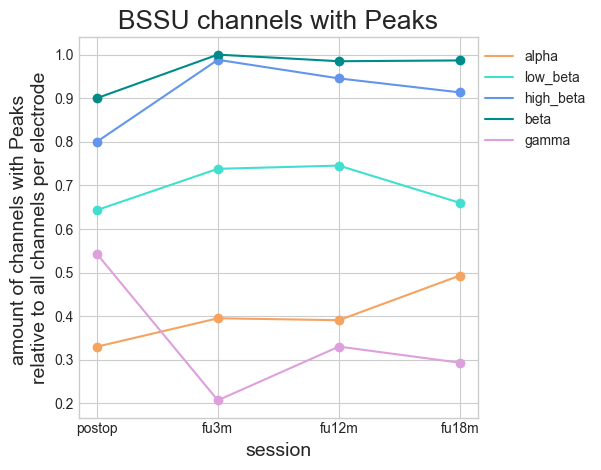

In [60]:
plot_peaks_per_session = fooof_fit.fooof_plot_peaks_per_session()

In [61]:
plot_peaks_per_session

,session,frequency_band,mean_percentage_chans_with_peaks,std_percentage_chans_with_peaks,sample_size
postop_alpha,postop,alpha,0.33,0.209205,20
postop_low_beta,postop,low_beta,0.643333,0.268556,20
postop_high_beta,postop,high_beta,0.8,0.222111,20
postop_beta,postop,beta,0.9,0.1542,20
postop_gamma,postop,gamma,0.543333,0.315718,20
fu3m_alpha,fu3m,alpha,0.395238,0.246839,28
fu3m_low_beta,fu3m,low_beta,0.738095,0.255684,28
fu3m_high_beta,fu3m,high_beta,0.988095,0.035873,28
fu3m_beta,fu3m,beta,1.0,0.0,28
fu3m_gamma,fu3m,gamma,0.207143,0.178476,28


In [31]:
peaks_per_session = loadResults.load_fooof_peaks_per_session()

## 3. Calculate the ratio of low beta and high beta Peaks as highest Peak in beta band 

First calculate the ratio of total low beta vs high beta Peaks (independent of which Peak is higher)

figure:  fooof_low_vs_high_beta_peaks_per_session.png 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\figures


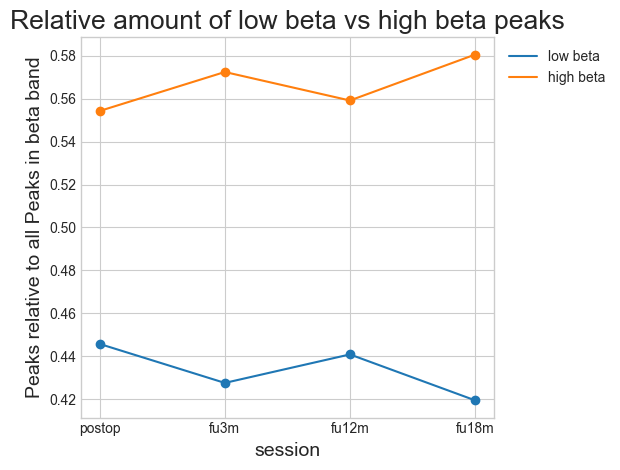

In [84]:
peaks_per_session = fooof_fit.fooof_low_vs_high_beta_ratio()

In [85]:
peaks_per_session

,session,beta_peaks,low_beta_peaks,high_beta_peaks,relative_low_beta,relative_high_beta
postop,postop,433,193,240,0.445727,0.554273
fu3m,fu3m,725,310,415,0.427586,0.572414
fu12m,fu12m,558,246,312,0.44086,0.55914
fu18m,fu18m,236,99,137,0.419492,0.580508


In [81]:
peaks_per_session = loadResults.load_fooof_peaks_per_session()

In [82]:
peaks_per_session.head()

,subject_hemisphere,session,frequency_band,total_chans_number,number_chans_with_peaks,percentage_chans_with_peaks
017_Right_fu3m_alpha,017_Right,fu3m,alpha,15,4,0.266667
017_Right_fu3m_low_beta,017_Right,fu3m,low_beta,15,4,0.266667
017_Right_fu3m_high_beta,017_Right,fu3m,high_beta,15,15,1.0
017_Right_fu3m_beta,017_Right,fu3m,beta,15,15,1.0
017_Right_fu3m_gamma,017_Right,fu3m,gamma,15,7,0.466667


In [68]:
session_df = peaks_per_session.loc[peaks_per_session.session=="postop"]
session_df.head()

,subject_hemisphere,session,frequency_band,total_chans_number,number_chans_with_peaks,percentage_chans_with_peaks
024_Right_postop_alpha,024_Right,postop,alpha,15,12,0.8
024_Right_postop_low_beta,024_Right,postop,low_beta,15,9,0.6
024_Right_postop_high_beta,024_Right,postop,high_beta,15,15,1.0
024_Right_postop_beta,024_Right,postop,beta,15,15,1.0
024_Right_postop_gamma,024_Right,postop,gamma,15,9,0.6


In [78]:
sessions = ["postop", "fu3m", "fu12m", "fu18m"]

rel_low_vs_high_beta = {}

for ses in sessions:

    session_df = peaks_per_session.loc[peaks_per_session.session==ses]

    # beta_peaks = session_df.loc[session_df.frequency_band=="beta"]
    # beta_peaks = beta_peaks.number_chans_with_peaks.values
    # beta_peaks = beta_peaks[0]

    low_beta_peaks = session_df.loc[session_df.frequency_band=="low_beta"]
    low_beta_peaks = np.sum(low_beta_peaks.number_chans_with_peaks.values)

    high_beta_peaks = session_df.loc[session_df.frequency_band=="high_beta"]
    high_beta_peaks = np.sum(high_beta_peaks.number_chans_with_peaks.values)

    beta_peaks = low_beta_peaks + high_beta_peaks

    relative_low_beta = low_beta_peaks / beta_peaks
    relative_high_beta = high_beta_peaks / beta_peaks

    rel_low_vs_high_beta[f"{ses}"] = [ses, beta_peaks, low_beta_peaks, high_beta_peaks, relative_low_beta, relative_high_beta]


# save the results in a dataframe
session_low_vs_high_peak_df = pd.DataFrame(rel_low_vs_high_beta)
session_low_vs_high_peak_df.rename(index={
    0: "session",
    1: "beta_peaks",
    2: "low_beta_peaks",
    3: "high_beta_peaks",
    4: "relative_low_beta",
    5: "relative_high_beta"
}, inplace=True)
session_low_vs_high_peak_df = session_low_vs_high_peak_df.transpose()



In [79]:
session_low_vs_high_peak_df

,session,beta_peaks,low_beta_peaks,high_beta_peaks,relative_low_beta,relative_high_beta
postop,postop,433,193,240,0.445727,0.554273
fu3m,fu3m,725,310,415,0.427586,0.572414
fu12m,fu12m,558,246,312,0.44086,0.55914
fu18m,fu18m,236,99,137,0.419492,0.580508


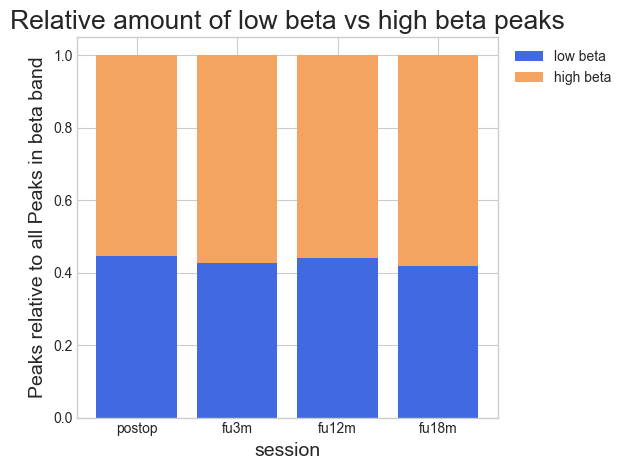

In [80]:
fig = plt.figure()

font = {"size": 14}

plt.bar(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_low_beta, label="low beta", color="royalblue")
plt.bar(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_high_beta, label="high beta", bottom=session_low_vs_high_peak_df.relative_low_beta, color="sandybrown")

# plt.plt(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_low_beta, label="low beta")
# plt.plt(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_high_beta, label="high beta")

# plt.scatter(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_low_beta,)
# plt.scatter(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_high_beta)

plt.title("Relative amount of low beta vs high beta peaks", fontdict={"size": 19})

plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))
plt.xlabel("session", fontdict=font)
plt.ylabel("Peaks relative to all Peaks in beta band", fontdict=font)
fig.tight_layout()

## 4. Center Frequency of highest Peak in beta band (13-35 Hz)

TODO: only choose highest beta channel in baseline postop

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 3.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.664e-07 U_stat=4.355e+04
3.0 vs. 12.0: Mann-Whitney-Wilcoxon test two-sided, P_val:6.025e-02 U_stat=7.372e+04
12.0 vs. 18.0: Mann-Whitney-Wilcoxon test two-sided, P_val:6.553e-03 U_stat=2.030e+04
0.0 vs. 12.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.052e-03 U_stat=3.704e+04
3.0 vs. 18.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.620e-01 U_stat=2.868e+04
0.0 vs. 18.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.175e-06 U_stat=1.424e+04
figure:  fooof_highest_beta_peak_center_freq.png 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\figures
file:  fooof_center_freq_session_description_highest_beta_peak.pickle 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\results


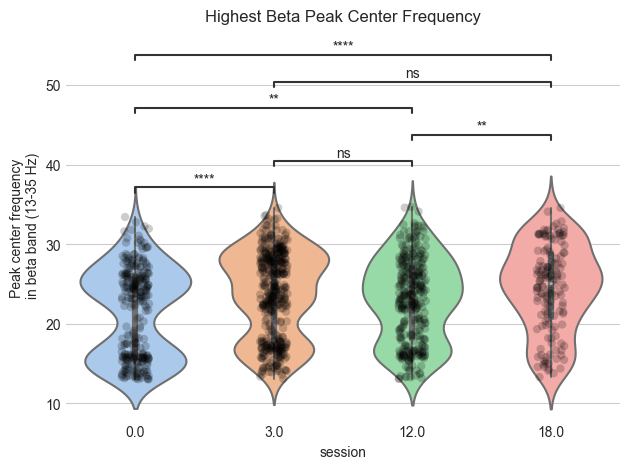

In [86]:
center_freq_beta = fooof_fit.fooof_highest_beta_peak_cf()

In [87]:
center_freq_beta["description_results"]

,number_observations,min_and_max,mean,variance,skewness,kurtosis
0.0_months_postop,270,"(13.0090415686, 33.41145762)",21.476836,31.298506,-0.026981,-1.360453
3.0_months_postop,420,"(13.0653434847, 34.5490897102)",23.590089,29.144374,-0.242321,-1.162387
12.0_months_postop,325,"(13.0720495525, 34.6774799402)",22.977031,27.480816,-0.060735,-0.976551
18.0_months_postop,148,"(13.2967825604, 34.5528467452)",24.432617,29.617164,-0.330326,-0.854177


In [27]:
fooof_result = loadResults.load_group_fooof_result()
fooof_result.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_knee,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
0,017_Right,fu3m,03,0.062071,0.984228,1.789802,1.510125,wo_knee,4,"[None, None, None]","[None, None, None]","[29.1230769409, 0.5757473113, 6.9654712301]","[29.1230769409, 0.5757473113, 6.9654712301]","[None, None, None]"
1,017_Right,fu3m,13,0.086020,0.961885,1.494661,1.099469,wo_knee,4,"[None, None, None]","[None, None, None]","[29.2192804454, 0.9026002023, 2.9996984052]","[29.2192804454, 0.9026002023, 2.9996984052]","[None, None, None]"
2,017_Right,fu3m,02,0.082106,0.972390,1.754591,1.557219,wo_knee,4,"[None, None, None]","[None, None, None]","[29.52639043, 1.0032092798, 6.4720784861]","[29.52639043, 1.0032092798, 6.4720784861]","[None, None, None]"
3,017_Right,fu3m,12,0.094479,0.949418,3.197360,4.266728,69876.354037,3,"[None, None, None]","[None, None, None]","[29.0569975142, 0.7209673255, 4.0650624862]","[29.0569975142, 0.7209673255, 4.0650624862]","[82.7458266127, 0.3105218111, 4.4872275805]"
4,017_Right,fu3m,01,0.067213,0.976017,1.573552,1.132607,wo_knee,4,"[None, None, None]","[None, None, None]","[30.8852999093, 0.3194295567, 8.4306160856]","[30.8852999093, 0.3194295567, 8.4306160856]","[64.6314589389, 0.1981129703, 9.4143048634]"


In [28]:
sessions = ["postop", "fu3m", "fu12m", "fu18m"]
beta_peak_parameters = {}

for ses in sessions:

    if ses == "postop":
        numeric_session = 0
    
    elif ses == "fu3m":
        numeric_session = 3
    
    elif ses == "fu12m":
        numeric_session = 12
    
    elif ses == "fu18m":
        numeric_session = 18

    session_df = fooof_result.loc[fooof_result.session==ses]
    beta_peaks_wo_None = []

    # only get the rows with Peaks (drop all rows with None)
    for item in session_df.beta_peak_CF_power_bandWidth.values:
    
        if None not in item:
            beta_peaks_wo_None.append(item)

    beta_peak_ses_df = session_df.loc[session_df["beta_peak_CF_power_bandWidth"].isin(beta_peaks_wo_None)]

    # get only the center frequency from the column beta_peak_CF_power_bandWidth
    for i, item in enumerate(beta_peak_ses_df.beta_peak_CF_power_bandWidth.values):
        # item is a list of center frequency, power, band width of highest Peak in beta band

        beta_cf = item[0]
        beta_power = item[1]
        beta_band_width = item[2]

        beta_peak_parameters[f"{ses}_{i}"] = [numeric_session, beta_cf, beta_power, beta_band_width]


# save the results in a dataframe
beta_peak_parameters_df = pd.DataFrame(beta_peak_parameters)
beta_peak_parameters_df.rename(index={
    0: "session",
    1: "beta_cf",
    2: "beta_power",
    3: "beta_band_width",
}, inplace=True)
beta_peak_parameters_df = beta_peak_parameters_df.transpose()


In [29]:
# only get the rows with Peaks (drop all rows with None)
beta_peaks_wo_None=[]
for item in fooof_result.beta_peak_CF_power_bandWidth.values:

    if None not in item:
        beta_peaks_wo_None.append(item)

beta_peak_wo_none_df = fooof_result.loc[fooof_result["beta_peak_CF_power_bandWidth"].isin(beta_peaks_wo_None)]

In [30]:
beta_peak_wo_none_df.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_knee,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
0,017_Right,fu3m,03,0.062071,0.984228,1.789802,1.510125,wo_knee,4,"[None, None, None]","[None, None, None]","[29.1230769409, 0.5757473113, 6.9654712301]","[29.1230769409, 0.5757473113, 6.9654712301]","[None, None, None]"
1,017_Right,fu3m,13,0.086020,0.961885,1.494661,1.099469,wo_knee,4,"[None, None, None]","[None, None, None]","[29.2192804454, 0.9026002023, 2.9996984052]","[29.2192804454, 0.9026002023, 2.9996984052]","[None, None, None]"
2,017_Right,fu3m,02,0.082106,0.972390,1.754591,1.557219,wo_knee,4,"[None, None, None]","[None, None, None]","[29.52639043, 1.0032092798, 6.4720784861]","[29.52639043, 1.0032092798, 6.4720784861]","[None, None, None]"
3,017_Right,fu3m,12,0.094479,0.949418,3.197360,4.266728,69876.354037,3,"[None, None, None]","[None, None, None]","[29.0569975142, 0.7209673255, 4.0650624862]","[29.0569975142, 0.7209673255, 4.0650624862]","[82.7458266127, 0.3105218111, 4.4872275805]"
4,017_Right,fu3m,01,0.067213,0.976017,1.573552,1.132607,wo_knee,4,"[None, None, None]","[None, None, None]","[30.8852999093, 0.3194295567, 8.4306160856]","[30.8852999093, 0.3194295567, 8.4306160856]","[64.6314589389, 0.1981129703, 9.4143048634]"


In [90]:
# merge dataframe with all columns + columns from beta_peak_parameters_df


In [116]:
beta_peak_parameters_df.head()

,session,beta_cf,beta_power,beta_band_width
postop_0,0.0,15.439420,0.480978,2.265218
postop_1,0.0,14.284981,0.642110,3.707680
postop_2,0.0,22.669247,0.141364,12.190925
postop_3,0.0,23.033545,0.546670,8.080994
postop_4,0.0,17.387427,0.261385,2.263232


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 3.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.363e-13 U_stat=2.540e+04
3.0 vs. 12.0: Mann-Whitney-Wilcoxon test two-sided, P_val:9.243e-02 U_stat=5.398e+04
12.0 vs. 18.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.395e-02 U_stat=1.805e+04
0.0 vs. 12.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.366e-08 U_stat=2.228e+04
3.0 vs. 18.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.112e-01 U_stat=2.453e+04
0.0 vs. 18.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.029e-09 U_stat=1.025e+04


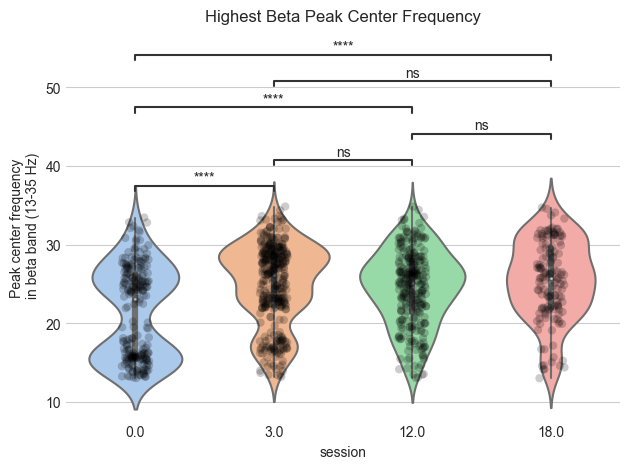

In [36]:
fig=plt.figure()
ax = fig.add_subplot()

sns.violinplot(data=beta_peak_parameters_df, x="session", y="beta_cf", palette="pastel", inner="box", ax=ax)

# statistical test: doesn't work if groups have different sample size
num_sessions = [0.0, 3.0, 12.0, 18.0]
pairs = list(combinations(num_sessions, 2))

annotator = Annotator(ax, pairs, data=beta_peak_parameters_df, x='session', y="beta_cf")
annotator.configure(test='Mann-Whitney', text_format='star') # or t-test_ind ??
annotator.apply_and_annotate()

sns.stripplot(
    data=beta_peak_parameters_df,
    x="session",
    y="beta_cf",
    ax=ax,
    size=6,
    color="black",
    alpha=0.2, # Transparency of dots
)

sns.despine(left=True, bottom=True) # get rid of figure frame

plt.title("Highest Beta Peak Center Frequency")
plt.ylabel("Peak center frequency \nin beta band (13-35 Hz)")
plt.xlabel("session")

fig.tight_layout()



In [133]:
# describe each group
num_sessions = [0.0, 3.0, 12.0, 18.0]
group_description = {}

for ses in num_sessions:

    group = beta_peak_parameters_df.loc[beta_peak_parameters_df.session==ses]
    group = np.array(group.beta_cf.values)

    description = scipy.stats.describe(group)

    group_description[f"{ses}_months_postop"] = description


description_results = pd.DataFrame(group_description)
description_results.rename(index={0: "number_observations", 1: "min_and_max", 2: "mean", 3: "variance", 4: "skewness", 5: "kurtosis"}, inplace=True)
description_results = description_results.transpose()

In [134]:
description_results

,number_observations,min_and_max,mean,variance,skewness,kurtosis
0.0_months_postop,223,"(13.0182812573, 33.4421995766)",21.402832,33.696318,0.082395,-1.43541
3.0_months_postop,354,"(13.1798526772, 34.8422643731)",24.909206,25.981049,-0.527289,-0.679124
12.0_months_postop,283,"(13.0159880365, 34.8330854639)",24.443643,22.880766,-0.330202,-0.504257
18.0_months_postop,144,"(13.0, 34.7135510742)",25.412741,25.477248,-0.416246,-0.392307


## 4. Center frequency of highest peak in beta; only in beta rank 1 channels from postop or per session

c:\Users\jebe12\Research\Longterm_beta_project\Code\BetaSenSightLongterm\src\bssu\tfr\fooof_fit.py:1093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sns.violinplot(data=parameters_to_plot, x="session", y=parameter, palette="pastel", inner="box", ax=ax)
c:\Users\jebe12\Research\Longterm_beta_project\Code\BetaSenSightLongterm\src\bssu\tfr\fooof_fit.py:1094: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:9.720e-01 U_stat=2.360e+02
3 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:3.521e-01 U_stat=2.350e+02
12 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:5.824e-01 U_stat=8.700e+01
0 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:3.686e-01 U_stat=1.400e+02
3 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:1.315e-01 U_stat=9.400e+01
0 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:1.674e-01 U_stat=5.700e+01
figure:  fooof_highest_beta_peak_center_frequency_highest_fu3m_ring.png 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\figures
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Ma

c:\Users\jebe12\Research\Longterm_beta_project\Code\BetaSenSightLongterm\src\bssu\tfr\fooof_fit.py:1093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sns.violinplot(data=parameters_to_plot, x="session", y=parameter, palette="pastel", inner="box", ax=ax)
c:\Users\jebe12\Research\Longterm_beta_project\Code\BetaSenSightLongterm\src\bssu\tfr\fooof_fit.py:1094: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


figure:  fooof_highest_beta_peak_center_frequency_highest_fu3m_segm_inter.png 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\figures
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:7.235e-01 U_stat=2.090e+02
3 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:4.579e-01 U_stat=3.160e+02
12 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:1.943e-01 U_stat=7.000e+01
0 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:7.382e-01 U_stat=1.710e+02
3 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:3.448e-01 U_stat=1.110e+02
0 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:3.845e-01 U_stat=6.300e+01


c:\Users\jebe12\Research\Longterm_beta_project\Code\BetaSenSightLongterm\src\bssu\tfr\fooof_fit.py:1093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sns.violinplot(data=parameters_to_plot, x="session", y=parameter, palette="pastel", inner="box", ax=ax)
c:\Users\jebe12\Research\Longterm_beta_project\Code\BetaSenSightLongterm\src\bssu\tfr\fooof_fit.py:1094: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


figure:  fooof_highest_beta_peak_center_frequency_highest_fu3m_segm_intra.png 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\figures
file:  fooof_center_frequency_session_description_highest_beta_peak_highest_fu3m.pickle 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\results


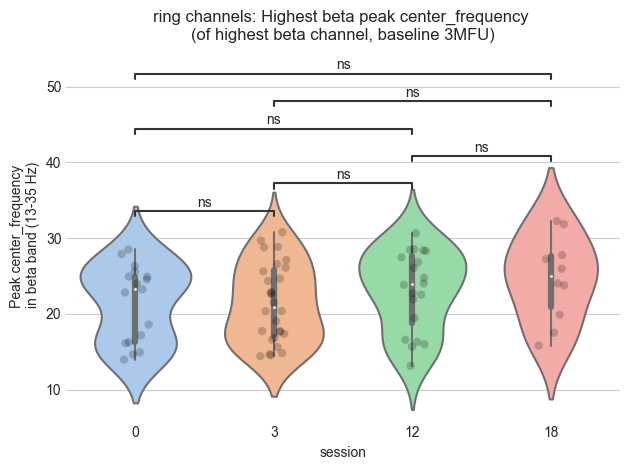

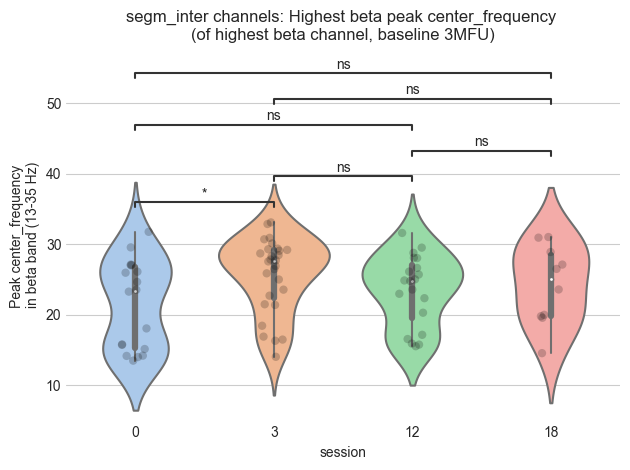

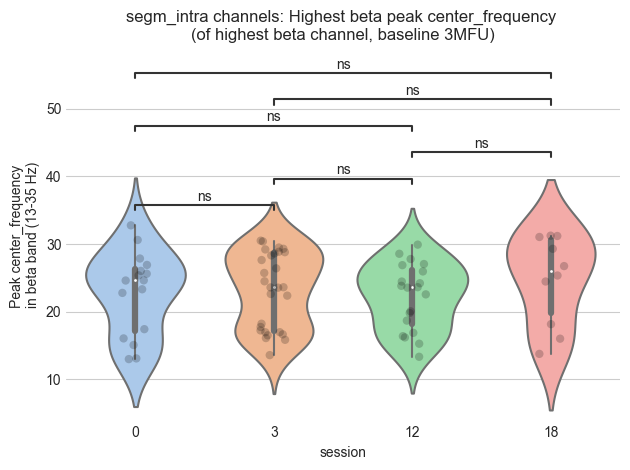

In [20]:
highest_beta_peak_cf = fooof_fit.fooof_highest_beta_peak_analysis(
    highest_beta_session="highest_fu3m",
    cf_or_power = "center_frequency"
)

In [9]:
highest_beta_peak_cf["description_results"]

,number_observations,min_and_max,mean,variance,skewness,kurtosis
ring_0.0_months_postop,55,"(13.4245851469, 31.0630557212)",21.596235,26.213893,-0.163211,-1.345675
ring_3.0_months_postop,84,"(13.8891013493, 33.520389333)",22.804518,25.411134,-0.010466,-0.937458
ring_12.0_months_postop,64,"(13.1012389915, 32.0818878488)",22.572405,26.965538,-0.02005,-1.252484
ring_18.0_months_postop,30,"(14.3628761744, 32.2596806925)",24.515084,23.920303,-0.337015,-0.493438
segm_inter_0.0_months_postop,53,"(13.0393681742, 31.7754178983)",20.562119,35.414841,0.134319,-1.56671
segm_inter_3.0_months_postop,84,"(14.0542362957, 33.6745978912)",24.732585,30.854125,-0.433041,-1.135494
segm_inter_12.0_months_postop,66,"(13.2854438887, 34.6774799402)",22.981486,29.263635,-0.045712,-0.981356
segm_inter_18.0_months_postop,30,"(14.2929891979, 31.6695464954)",24.809742,32.916103,-0.514816,-0.968431
segm_intra_0.0_months_postop,104,"(13.0090415686, 33.41145762)",21.864685,33.35235,-0.06837,-1.215243
segm_intra_3.0_months_postop,168,"(13.5980312848, 34.5490897102)",23.374824,30.338946,-0.221444,-1.260297


In [19]:
highest_beta_peak_cf["beta_peak_parameters_df"].head()

,session,beta_cf,beta_power,beta_band_width
postop_0,0.0,23.247233,0.941201,14.895322
postop_1,0.0,24.589540,0.406245,7.411685
postop_2,0.0,25.584188,0.809415,3.442456
postop_3,0.0,16.265086,0.738941,2.446646
postop_4,0.0,15.742801,0.967992,2.945254


In [12]:
highest_beta_df = fooof_fit.highest_beta_channels_fooof(
    fooof_spectrum="periodic_spectrum",
    highest_beta_session="highest_postop"
)

## 4. Linear mixed effects model beta center frequency of all channels

c:\Users\jebe12\anaconda3\envs\bssu\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jebe12\anaconda3\envs\bssu\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    session  
No. Observations:    70         Method:                REML     
No. Groups:          28         Scale:                 29.6340  
Min. group size:     2          Log-Likelihood:        -217.7245
Max. group size:     4          Converged:             Yes      
Mean group size:     2.5                                        
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              5.358    2.710  1.977 0.048  0.047 10.670
beta_center_frequency -0.052    0.121 -0.432 0.666 -0.289  0.185
group Var              0.041    0.696                           



c:\Users\jebe12\anaconda3\envs\bssu\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jebe12\anaconda3\envs\bssu\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\jebe12\anaconda3\envs\bssu\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jebe12\anaconda3\envs\bssu\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
c:\Users\jebe12\anaconda3\envs\bssu\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

            Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   session  
No. Observations:    70        Method:               REML     
No. Groups:          28        Scale:                29.6687  
Min. group size:     2         Log-Likelihood:       -217.7579
Max. group size:     4         Converged:            No       
Mean group size:     2.5                                      
--------------------------------------------------------------
                      Coef. Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept             3.513    2.949 1.191 0.233 -2.266  9.293
beta_center_frequency 0.029    0.122 0.238 0.812 -0.211  0.269
group Var             0.077    0.726                          



c:\Users\jebe12\anaconda3\envs\bssu\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jebe12\anaconda3\envs\bssu\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    session  
No. Observations:    67         Method:                REML     
No. Groups:          28         Scale:                 26.5915  
Min. group size:     1          Log-Likelihood:        -204.9347
Max. group size:     4          Converged:             Yes      
Mean group size:     2.4                                        
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              5.711    2.797  2.042 0.041  0.230 11.193
beta_center_frequency -0.080    0.122 -0.655 0.512 -0.319  0.159
group Var              0.197    0.688                           

figure:  lme_beta_center_frequency_highest_postop_beta_channels.png 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\figures


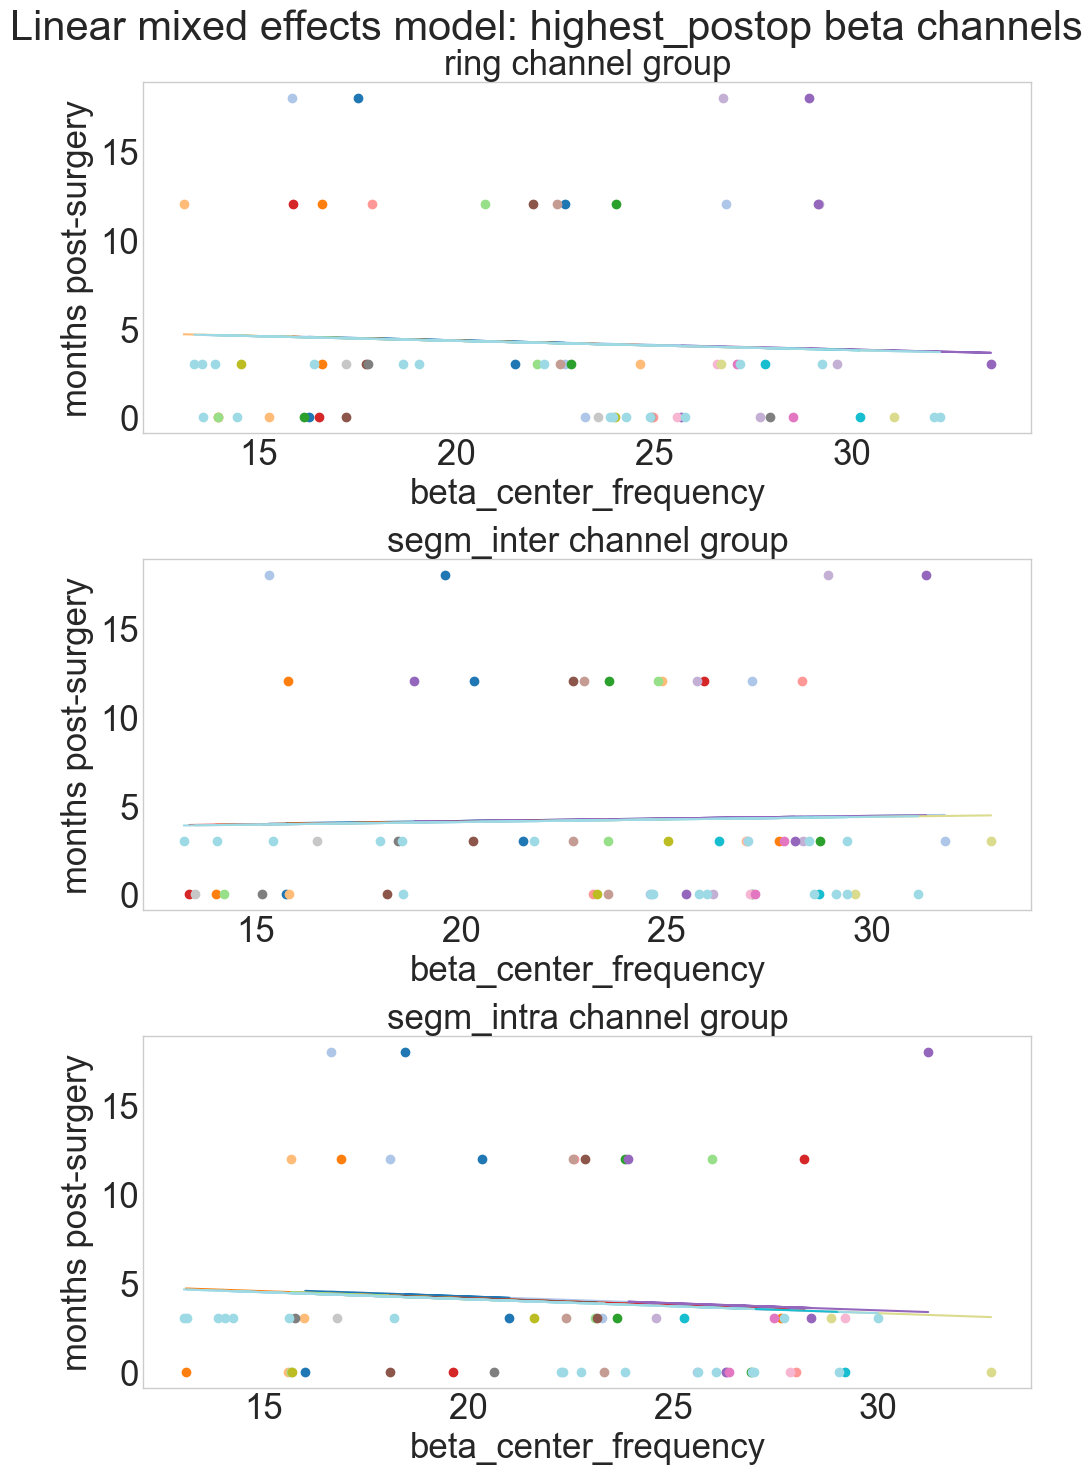

In [159]:
lme_highest_beta_channels = fooof_fit.fooof_mixedlm_highest_beta_channels(
    fooof_spectrum="periodic_spectrum",
    highest_beta_session="highest_postop",
    data_to_fit="beta_center_frequency"
)

In [160]:
lme_highest_beta_channels["group_dict"]["ring"].head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,...,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,beta_average,beta_rank,group,beta_center_frequency,beta_peak_power,beta_band_width,predictions
1,024_Right,0,01,0.168730,0.901904,0.812936,-0.341520,"[0.011756927, 0.0102954108, 0.011674533, 0.015...","[-0.3304521005, -0.5693263215, -0.7030158027, ...","[0.0110675697, 0.0169115197, 0.0263729918, 0.0...",...,"[None, None, None]","[23.2472327802, 0.9412012309, 14.8953221323]","[23.2472327802, 0.9412012309, 14.8953221323]",0.216209,1.0,1,23.247233,0.941201,14.895322,4.166393
1,024_Right,3,01,0.087865,0.976894,1.157287,0.412996,"[0.0126042727, 0.0152599415, 0.0236496133, 0.0...","[0.4151055369, 0.0702914975, -0.1252453982, -0...","[0.0021098475, 0.005673872, 0.0139250797, 0.03...",...,"[None, None, None]","[22.7534379906, 1.2013413463, 9.6944967328]","[22.7534379906, 1.2013413463, 9.6944967328]",0.620562,1.0,1,22.753438,1.201341,9.694497,4.192180
1,024_Right,12,01,0.078388,0.983705,1.708810,1.381138,"[0.1883771565, 0.5780846679, 1.8247334884, 2.9...","[1.3845264424, 0.8995835023, 0.7407235567, 0.7...","[0.0033882788, 0.0328482996, 0.1748947964, 0.3...",...,"[None, None, None]","[26.8200017184, 0.4285952743, 2.0]","[26.8200017184, 0.4285952743, 2.0]",0.106425,1.0,1,26.820002,0.428595,2.000000,3.979813
1,024_Right,18,01,0.059948,0.988565,1.507970,1.020774,"[0.0024574335, 0.0018896077, 0.0027679893, 0.0...","[1.0208754903, 0.5670519857, 0.3018894874, 0.1...","[0.0001017282, 0.0002224412, 0.0006002876, 0.0...",...,"[15.8290898317, 0.8605488106, 5.2908542372]","[24.0098861175, 0.6459881968, 10.9998587826]","[15.8290898317, 0.8605488106, 5.2908542372]",0.333479,1.0,1,15.829090,0.860549,5.290854,4.553789
0,024_Left,0,12,0.071229,0.973233,1.291554,0.296909,"[0.0, 3e-10, 8e-09, 1.721e-07, 2.7911e-06, 3.3...","[0.2969089674, -0.0918876077, -0.3193190175, -...","[0.0, 2e-10, 7.3e-09, 2.261e-07, 4.8911e-06, 7...",...,"[16.2650855003, 0.7389412301, 2.4466462668]","[23.6772808992, 0.477609233, 2.0]","[16.2650855003, 0.7389412301, 2.4466462668]",0.058358,1.0,0,16.265086,0.738941,2.446646,4.530264


## 5. How many channels have a double Peak in Beta Band?

In [8]:
fooof_group_result = loadResults.load_group_fooof_result()

In [9]:
fooof_group_result.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
0,017_Right,fu3m,03,0.067918,0.984748,1.604428,1.193436,"[0.1656846121, 0.1649261572, 0.2233027721, 0.3...","[1.1980212709, 0.7241873517, 0.4627028941, 0.3...","[0.0045849614, 0.0137320197, 0.0347733225, 0.0...",4,"[8.0361304032, 0.2920797265, 4.8819935856]","[None, None, None]","[28.9598253493, 0.5980392495, 7.9884764248]","[28.9598253493, 0.5980392495, 7.9884764248]","[None, None, None]"
1,017_Right,fu3m,13,0.065586,0.981937,1.434853,0.962182,"[0.00025127, 0.000170312, 0.0001713231, 0.0002...","[0.9621936864, 0.5302699046, 0.2776223402, 0.0...","[1.19052e-05, 2.18158e-05, 3.92643e-05, 6.9409...",6,"[None, None, None]","[13.6525290401, 0.2751629141, 3.0043817259]","[29.1048971253, 0.9469996841, 2.8278507671]","[29.1048971253, 0.9469996841, 2.8278507671]","[None, None, None]"
2,017_Right,fu3m,02,0.103924,0.967577,1.543910,1.189600,"[0.109168079, 0.1121990258, 0.1548672324, 0.22...","[1.1926531892, 0.7339231906, 0.4760453097, 0.3...","[0.0030531805, 0.0090862654, 0.02307736, 0.050...",2,"[8.3809412329, 0.2263361313, 5.0237181784]","[None, None, None]","[29.09726726, 0.9610582984, 9.2634518255]","[29.09726726, 0.9610582984, 9.2634518255]","[None, None, None]"
3,017_Right,fu3m,12,0.075776,0.975321,1.304337,0.703128,"[0.0, 0.0, 0.0, 1e-10, 2e-10, 7e-10, 1.8e-09, ...","[0.7031279556, 0.3104833187, 0.08080093, -0.08...","[0.0, 0.0, 0.0, 0.0, 2e-10, 6e-10, 2e-09, 6.7e...",5,"[None, None, None]","[None, None, None]","[29.4862292984, 1.0958098075, 5.0314063169]","[29.4862292984, 1.0958098075, 5.0314063169]","[63.6509137528, 0.2746917897, 2.0]"
4,017_Right,fu3m,01,0.064701,0.983808,1.540660,1.072680,"[8.3557e-06, 0.0002934974, 0.0064128567, 0.068...","[1.0726801317, 0.6089264433, 0.3388765877, 0.1...","[3.07e-07, 3.13674e-05, 0.0012781982, 0.020770...",6,"[None, None, None]","[None, None, None]","[33.2211166882, 0.4390133671, 2.0]","[33.2211166882, 0.4390133671, 2.0]","[63.7733341896, 0.1903054915, 10.556379168]"


In [90]:
fooof_group_result.iloc[[3]]

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
3,017_Right,fu3m,12,0.075776,0.975321,1.304337,0.703128,"[0.0, 0.0, 0.0, 1e-10, 2e-10, 7e-10, 1.8e-09, ...","[0.7031279556, 0.3104833187, 0.08080093, -0.08...","[0.0, 0.0, 0.0, 0.0, 2e-10, 6e-10, 2e-09, 6.7e...",5,"[None, None, None]","[None, None, None]","[29.4862292984, 1.0958098075, 5.0314063169]","[29.4862292984, 1.0958098075, 5.0314063169]","[63.6509137528, 0.2746917897, 2.0]"


In [97]:
low_beta = []
high_beta = []

for idx, item in enumerate(fooof_group_result.low_beta_peak_CF_power_bandWidth.values):
    if None not in item:
        low_beta.append(idx)

for idx, item in enumerate(fooof_group_result.high_beta_peak_CF_power_bandWidth.values):
    if None not in item:
        high_beta.append(idx)

In [91]:
sessions = ["postop", "fu3m", "fu12m", "fu18m"]

session_peak_dict = {}

# list of unique STNs
stn_unique = list(fooof_group_result.subject_hemisphere.unique())

# dataframe with only rows of all channels that contain double peaks
complete_double_peak_df = pd.DataFrame()

for stn in stn_unique:
    # get dataframe of one stn 
    fooof_stn = fooof_group_result.loc[fooof_group_result.subject_hemisphere==stn]

    for ses in sessions:

        # check if session exists for current STN
        if ses not in fooof_stn.session.values:
            continue

        # get the dataframes for each session seperately
        fooof_session = fooof_stn.loc[(fooof_stn["session"]==ses)]
        fooof_session = fooof_session.reset_index()

        # get total number of recordings (per STN all 15 recordings included) per session 
        total_number_of_channels = len(fooof_session) # should always be 15
 
        # new for each stn and session
        low_beta_idx = []
        high_beta_idx = []
        double_peak_df = pd.DataFrame()

        for idx, item in enumerate(fooof_session["low_beta_peak_CF_power_bandWidth"].values):
            # in the column "{freq}_peak_CF_power_bandWidth" each cell contains a list
            # only take rows with a list, if None is not in the list (so only take rows, if there was a Peak)
            if None not in item:
                low_beta_idx.append(idx)
        
        for idx, item in enumerate(fooof_session["high_beta_peak_CF_power_bandWidth"].values):
            # in the column "{freq}_peak_CF_power_bandWidth" each cell contains a list
            # only take rows with a list, if None is not in the list (so only take rows, if there was a Peak)
            if None not in item:
                high_beta_idx.append(idx)
        
        double_peak_idx = list(set(low_beta_idx) & set(high_beta_idx))

        for d_p_idx in double_peak_idx:

            row_by_index = fooof_session.iloc[[d_p_idx]]
            double_peak_df = pd.concat([double_peak_df, row_by_index])
    
        # count how many double Peaks exist
        number_double_peaks =  len(double_peak_df)

        # calculate % of channels with double Peaks in one STN per sesion
        percentage_double_peaks = number_double_peaks / total_number_of_channels

        session_peak_dict[f"{stn}_{ses}"] = [stn, ses, total_number_of_channels, number_double_peaks, percentage_double_peaks]

        # add the double peak rows to the complete double peak dataframe
        complete_double_peak_df = pd.concat([complete_double_peak_df, double_peak_df])
    
# save the results in a dataframe
session_peak_df = pd.DataFrame(session_peak_dict)
session_peak_df.rename(index={
    0: "subject_hemisphere",
    1: "session",
    2: "total_chans_number",
    3: "number_double_peaks",
    4: "percentage_double_peaks",
}, inplace=True)
session_peak_df = session_peak_df.transpose()

In [97]:
session_peak_df.head()

,subject_hemisphere,session,total_chans_number,number_double_peaks,percentage_double_peaks
017_Right_fu3m,017_Right,fu3m,15,4,0.266667
017_Right_fu12m,017_Right,fu12m,15,10,0.666667
017_Left_fu3m,017_Left,fu3m,15,5,0.333333
017_Left_fu12m,017_Left,fu12m,15,12,0.8
019_Right_fu3m,019_Right,fu3m,15,12,0.8


In [93]:
complete_double_peak_df.head()

,index,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
1,1,017_Right,fu3m,13,0.065586,0.981937,1.434853,0.962182,"[0.00025127, 0.000170312, 0.0001713231, 0.0002...","[0.9621936864, 0.5302699046, 0.2776223402, 0.0...","[1.19052e-05, 2.18158e-05, 3.92643e-05, 6.9409...",6,"[None, None, None]","[13.6525290401, 0.2751629141, 3.0043817259]","[29.1048971253, 0.9469996841, 2.8278507671]","[29.1048971253, 0.9469996841, 2.8278507671]","[None, None, None]"
5,5,017_Right,fu3m,23,0.065806,0.981375,1.270456,0.586390,"[0.0, 9e-10, 1.81e-08, 3.225e-07, 4.5041e-06, ...","[0.5863896015, 0.2039441538, -0.0197720839, -0...","[0.0, 2e-10, 8.2e-09, 2.112e-07, 3.9175e-06, 5...",6,"[None, None, None]","[13.5482374907, 0.502386695, 3.5204739647]","[30.781507243, 1.0756834082, 5.0572150049]","[30.781507243, 1.0756834082, 5.0572150049]","[None, None, None]"
11,11,017_Right,fu3m,2A2C,0.061880,0.981951,1.257017,0.588691,"[6.33e-08, 9.46e-08, 2.001e-07, 4.766e-07, 1.1...","[0.5886913749, 0.2102915915, -0.0110580389, -0...","[7.1e-09, 2.53e-08, 8.92e-08, 3.048e-07, 1.002...",6,"[None, None, None]","[18.9683024982, 0.2633963957, 2.0]","[28.3198990082, 0.9595968113, 8.8782860886]","[28.3198990082, 0.9595968113, 8.8782860886]","[None, None, None]"
13,13,017_Right,fu3m,1B2B,0.066098,0.975025,1.140977,0.528676,"[0.0272617765, 0.0190132647, 0.0179378651, 0.0...","[0.5321666933, 0.1905650627, -0.0077053174, -0...","[0.0034907277, 0.0053573729, 0.0080030543, 0.0...",6,"[None, None, None]","[17.3561037974, 0.1399782145, 12.1680971481]","[31.2598267873, 0.982496033, 3.8570494911]","[31.2598267873, 0.982496033, 3.8570494911]","[None, None, None]"
0,15,017_Right,fu12m,03,0.072174,0.981862,1.648730,1.341568,"[8.11e-08, 1.067e-07, 2.142e-07, 4.951e-07, 1....","[1.341568472, 0.8452513005, 0.5549243831, 0.34...","[1.6e-09, 6.6e-09, 2.59e-08, 9.63e-08, 3.392e-...",6,"[None, None, None]","[14.4835302835, 0.4581646047, 2.8711488936]","[22.0287538812, 0.4461514523, 2.0]","[14.4835302835, 0.4581646047, 2.8711488936]","[None, None, None]"


In [98]:
sessions = ["postop","fu3m","fu12m","fu18m"]
description = {}
for ses in sessions:
    ses_df = session_peak_df.loc[session_peak_df.session==ses]

    description[f"{ses}"] = scipy.stats.describe(np.array(ses_df.percentage_double_peaks.values))

ValueError: data type <class 'numpy.object_'> not inexact

In [138]:
description

{'0': DescribeResult(nobs=18, minmax=(0.0, 0.8), mean=0.38888888888888895, variance=0.07856209150326796, skewness=-0.17809516232608763, kurtosis=-1.4553281967657885),
 '3': DescribeResult(nobs=24, minmax=(0.0, 0.9333333333333333), mean=0.5166666666666666, variance=0.09632850241545893, skewness=-0.28687249904958906, kurtosis=-1.4356952502442133),
 '12': DescribeResult(nobs=20, minmax=(0.0, 1.0), mean=0.4833333333333333, variance=0.06684210526315788, skewness=0.00034718975946361523, kurtosis=-0.3900818172006706),
 '18': DescribeResult(nobs=10, minmax=(0.13333333333333333, 0.7333333333333333), mean=0.38666666666666666, variance=0.05017283950617283, skewness=0.07114459522826369, kurtosis=-1.418965837931676)}

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:2.389e-02 U_stat=1.720e+02
3 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:5.285e-01 U_stat=3.405e+02
12 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:5.133e-02 U_stat=1.580e+02
0 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:3.194e-02 U_stat=1.350e+02
3 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:9.828e-02 U_stat=1.900e+02
0 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:9.823e-01 U_stat=9.900e+01


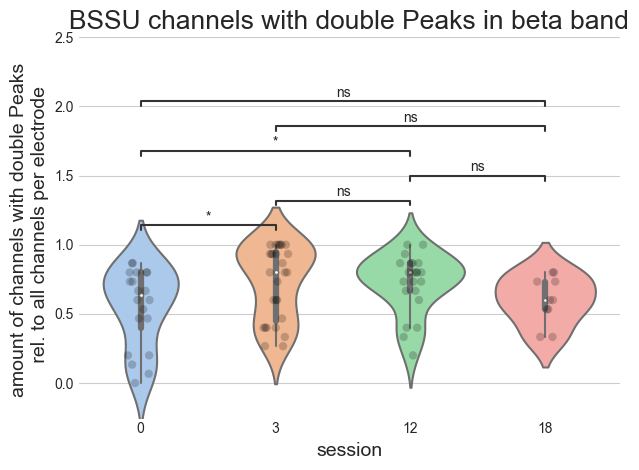

In [100]:

# replace session names by integers because of seaborn plot
session_peak_df = session_peak_df.replace(to_replace="postop", value=0)
session_peak_df = session_peak_df.replace(to_replace="fu3m", value=3)
session_peak_df = session_peak_df.replace(to_replace="fu12m", value=12)
session_peak_df = session_peak_df.replace(to_replace="fu18m", value=18)

fig=plt.figure()
ax=fig.add_subplot()
font = {"size": 14}

sns.violinplot(data=session_peak_df, x="session", y="percentage_double_peaks", palette="pastel", inner="box", ax=ax)

sns.stripplot(
    data=session_peak_df,
    x="session",
    y="percentage_double_peaks",
    ax=ax,
    size=6,
    color="black",
    alpha=0.2, # Transparency of dots
)

sns.despine(left=True, bottom=True) # get rid of figure frame


# statistical test: doesn't work if groups have different sample size
num_sessions = [0, 3, 12, 18]
pairs = list(combinations(num_sessions, 2))

annotator = Annotator(ax, pairs, data=session_peak_df, x='session', y='percentage_double_peaks')
annotator.configure(test='Mann-Whitney', text_format='star') # or ANOVA first to check if there is any difference between all groups
annotator.apply_and_annotate()

plt.title(f"BSSU channels with double Peaks in beta band", fontdict={"size": 19})
plt.ylabel(f"amount of channels with double Peaks \n rel. to all channels per electrode", fontdict=font)
plt.ylim(-0.25, 2.5)
plt.xlabel("session", fontdict=font)

fig.tight_layout()

## 6. Rank channels by highest peak power in beta

In [101]:
fooof_group_result = loadResults.load_group_fooof_result()

In [102]:
fooof_group_result.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
0,017_Right,fu3m,03,0.067918,0.984748,1.604428,1.193436,"[0.1656846121, 0.1649261572, 0.2233027721, 0.3...","[1.1980212709, 0.7241873517, 0.4627028941, 0.3...","[0.0045849614, 0.0137320197, 0.0347733225, 0.0...",4,"[8.0361304032, 0.2920797265, 4.8819935856]","[None, None, None]","[28.9598253493, 0.5980392495, 7.9884764248]","[28.9598253493, 0.5980392495, 7.9884764248]","[None, None, None]"
1,017_Right,fu3m,13,0.065586,0.981937,1.434853,0.962182,"[0.00025127, 0.000170312, 0.0001713231, 0.0002...","[0.9621936864, 0.5302699046, 0.2776223402, 0.0...","[1.19052e-05, 2.18158e-05, 3.92643e-05, 6.9409...",6,"[None, None, None]","[13.6525290401, 0.2751629141, 3.0043817259]","[29.1048971253, 0.9469996841, 2.8278507671]","[29.1048971253, 0.9469996841, 2.8278507671]","[None, None, None]"
2,017_Right,fu3m,02,0.103924,0.967577,1.543910,1.189600,"[0.109168079, 0.1121990258, 0.1548672324, 0.22...","[1.1926531892, 0.7339231906, 0.4760453097, 0.3...","[0.0030531805, 0.0090862654, 0.02307736, 0.050...",2,"[8.3809412329, 0.2263361313, 5.0237181784]","[None, None, None]","[29.09726726, 0.9610582984, 9.2634518255]","[29.09726726, 0.9610582984, 9.2634518255]","[None, None, None]"
3,017_Right,fu3m,12,0.075776,0.975321,1.304337,0.703128,"[0.0, 0.0, 0.0, 1e-10, 2e-10, 7e-10, 1.8e-09, ...","[0.7031279556, 0.3104833187, 0.08080093, -0.08...","[0.0, 0.0, 0.0, 0.0, 2e-10, 6e-10, 2e-09, 6.7e...",5,"[None, None, None]","[None, None, None]","[29.4862292984, 1.0958098075, 5.0314063169]","[29.4862292984, 1.0958098075, 5.0314063169]","[63.6509137528, 0.2746917897, 2.0]"
4,017_Right,fu3m,01,0.064701,0.983808,1.540660,1.072680,"[8.3557e-06, 0.0002934974, 0.0064128567, 0.068...","[1.0726801317, 0.6089264433, 0.3388765877, 0.1...","[3.07e-07, 3.13674e-05, 0.0012781982, 0.020770...",6,"[None, None, None]","[None, None, None]","[33.2211166882, 0.4390133671, 2.0]","[33.2211166882, 0.4390133671, 2.0]","[63.7733341896, 0.1903054915, 10.556379168]"


In [9]:
# split an array with three peak parameters into three new columns

# define split array function
split_array = lambda x: pd.Series(x)

# column with arrays per cell
beta_peak_arrays = fooof_group_result.beta_peak_CF_power_bandWidth

# new columns with single parameters per cell
fooof_group_result_copy = fooof_group_result.copy()
fooof_group_result_copy[["beta_center_frequency", "beta_peak_power", "beta_band_width"]] = fooof_group_result_copy["beta_peak_CF_power_bandWidth"].apply(split_array)
fooof_group_result_copy = fooof_group_result_copy.drop(columns=["alpha_peak_CF_power_bandWidth", "low_beta_peak_CF_power_bandWidth", "high_beta_peak_CF_power_bandWidth", "gamma_peak_CF_power_bandWidth"])



Write Dataframe with ranks of beta peak power per stn-session-channel_group  

In [103]:
rank_beta_power = fooof_fit.fooof_rank_beta_peak_power()

file:  fooof_rank_beta_power_dataframe.pickle 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [8]:
rank_beta_power = loadResults.load_fooof_rank_beta_peak_power()

In [10]:
rank_beta_power.subject_hemisphere.unique()


array(['017_Right', '017_Left', '019_Right', '019_Left', '021_Right',
       '021_Left', '024_Right', '024_Left', '025_Right', '025_Left',
       '026_Right', '026_Left', '028_Right', '028_Left', '029_Right',
       '029_Left', '030_Right', '030_Left', '031_Right', '031_Left',
       '032_Right', '032_Left', '033_Right', '033_Left', '038_Right',
       '038_Left', '041_Right', '041_Left', '060_Right', '060_Left'],
      dtype=object)

In [9]:
rank_beta_power.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,beta_peak_CF_power_bandWidth,beta_center_frequency,beta_peak_power,beta_band_width,rank_beta_power
3,017_Right,fu3m,12,0.075776,0.975321,1.304337,0.703128,"[0.0, 0.0, 0.0, 1e-10, 2e-10, 7e-10, 1.8e-09, ...","[0.7031279556, 0.3104833187, 0.08080093, -0.08...","[0.0, 0.0, 0.0, 0.0, 2e-10, 6e-10, 2e-09, 6.7e...",5,"[29.4862292984, 1.0958098075, 5.0314063169]",29.486229,1.095810,5.031406,1.0
4,017_Right,fu3m,01,0.064701,0.983808,1.540660,1.072680,"[8.3557e-06, 0.0002934974, 0.0064128567, 0.068...","[1.0726801317, 0.6089264433, 0.3388765877, 0.1...","[3.07e-07, 3.13674e-05, 0.0012781982, 0.020770...",6,"[33.2211166882, 0.4390133671, 2.0]",33.221117,0.439013,2.000000,3.0
5,017_Right,fu3m,23,0.065806,0.981375,1.270456,0.586390,"[0.0, 9e-10, 1.81e-08, 3.225e-07, 4.5041e-06, ...","[0.5863896015, 0.2039441538, -0.0197720839, -0...","[0.0, 2e-10, 8.2e-09, 2.112e-07, 3.9175e-06, 5...",6,"[30.781507243, 1.0756834082, 5.0572150049]",30.781507,1.075683,5.057215,2.0
18,017_Right,fu12m,12,0.073584,0.982777,1.530858,1.065401,"[1.4638344481, 2.7473972589, 2.848984725, 0.90...","[1.1169079169, 0.8306240608, 0.6999836468, 0.3...","[0.0515071389, 0.2260573527, 0.3649875886, 0.2...",3,"[28.6375935846, 0.5495840362, 10.4158354341]",28.637594,0.549584,10.415835,2.0
19,017_Right,fu12m,01,0.066650,0.987536,1.878727,1.613434,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.5e-09, 1.293e-07, ...","[1.6134335378, 1.0478803019, 0.7170528667, 0.4...","[0.0, 0.0, 0.0, 0.0, 0.0, 5e-10, 5.29e-08, 3.2...",6,"[28.3105920686, 0.4102618576, 5.5276981195]",28.310592,0.410262,5.527698,3.0


Select only the rank 1 channel in postop and normalize the beta peak power values from all sessions to the highest postop peak power

In [106]:
normalized_peak_power = fooof_fit.fooof_rank1_baseline_beta_peak(session_baseline="postop")

In [107]:
normalized_peak_power.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,beta_peak_CF_power_bandWidth,beta_center_frequency,beta_peak_power,beta_band_width,rank_beta_power,peak_power_rel_to_postop,peak_cf_rel_to_postop
244,024_Right,0,01,0.168730,0.901904,0.812936,-0.341520,"[0.011756927, 0.0102954108, 0.011674533, 0.015...","[-0.3304521005, -0.5693263215, -0.7030158027, ...","[0.0110675697, 0.0169115197, 0.0263729918, 0.0...",2,"[23.2472327802, 0.9412012309, 14.8953221323]",23.247233,0.941201,14.895322,1.0,0.000000,0.000000
259,024_Right,3,01,0.087865,0.976894,1.157287,0.412996,"[0.0126042727, 0.0152599415, 0.0236496133, 0.0...","[0.4151055369, 0.0702914975, -0.1252453982, -0...","[0.0021098475, 0.005673872, 0.0139250797, 0.03...",5,"[22.7534379906, 1.2013413463, 9.6944967328]",22.753438,1.201341,9.694497,1.0,0.260140,-0.493795
274,024_Right,12,01,0.078388,0.983705,1.708810,1.381138,"[0.1883771565, 0.5780846679, 1.8247334884, 2.9...","[1.3845264424, 0.8995835023, 0.7407235567, 0.7...","[0.0033882788, 0.0328482996, 0.1748947964, 0.3...",5,"[26.8200017184, 0.4285952743, 2.0]",26.820002,0.428595,2.000000,1.0,-0.512606,3.572769
289,024_Right,18,01,0.059948,0.988565,1.507970,1.020774,"[0.0024574335, 0.0018896077, 0.0027679893, 0.0...","[1.0208754903, 0.5670519857, 0.3018894874, 0.1...","[0.0001017282, 0.0002224412, 0.0006002876, 0.0...",5,"[15.8290898317, 0.8605488106, 5.2908542372]",15.829090,0.860549,5.290854,1.0,-0.080652,-7.418143
252,024_Right,0,1A2A,0.059484,0.970786,0.969138,-0.255236,"[5.22e-08, 3.69e-07, 2.7334e-06, 1.79384e-05, ...","[-0.2552355658, -0.5469747157, -0.7176258533, ...","[4.08e-08, 5.646e-07, 6.1961e-06, 5.37349e-05,...",6,"[24.5895398631, 0.4062446027, 7.4116852256]",24.589540,0.406245,7.411685,1.0,0.000000,0.000000


analyze only the channels with highest peak power in postop normalized: peak power / peak power postop

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:2.011e-02 U_stat=1.000e+02
3 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:4.006e-02 U_stat=1.570e+02
12 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:8.615e-01 U_stat=2.200e+01
0 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:9.534e-01 U_stat=1.180e+02
3 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:5.381e-01 U_stat=4.400e+01
0 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:7.369e-01 U_stat=3.500e+01
figure:  MINUS_fooof_highest_beta_peak_ring_from_postop_power_normalized_no.png 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\figures
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 v

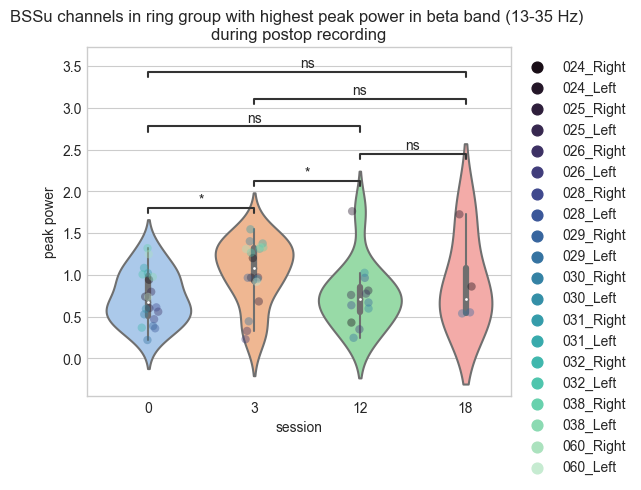

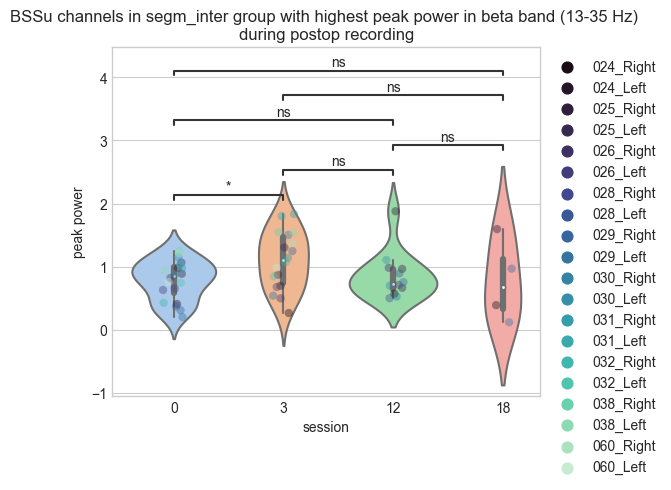

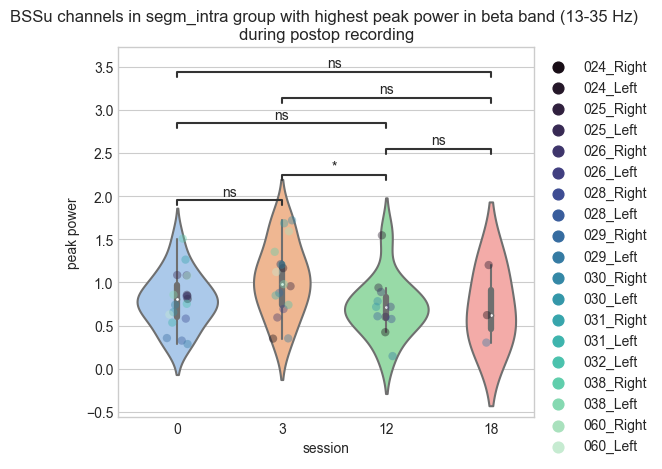

In [110]:
plot_channel_peak_parameters = fooof_fit.fooof_plot_highest_beta_peak_normalized_to_baseline(
    session_baseline="postop",
    peak_parameter="power",
    normalized_to_session_baseline="no"
)

In [59]:
plot_channel_peak_parameters

,number_observations,min_and_max,mean,variance,skewness,kurtosis,channel_group
0,18,"(0.2208671613, 0.8591104405)",0.551562,0.031559,0.005026,-0.761632,ring
3,16,"(0.4432406578, 1.0951401753)",0.699631,0.037204,0.441153,-0.888703,ring
12,12,"(nan, nan)",NaN,NaN,NaN,NaN,ring
18,4,"(0.3278300801, 0.9994923869)",0.589648,0.08297,0.801491,-0.868068,ring
0,18,"(0.2223067588, 1.1184569762)",0.626214,0.077483,0.178997,-1.22012,segm_inter
3,16,"(0.1435907271, 1.3310822649)",0.75329,0.134099,-0.217537,-1.058425,segm_inter
12,12,"(nan, nan)",NaN,NaN,NaN,NaN,segm_inter
18,4,"(nan, nan)",NaN,NaN,NaN,NaN,segm_inter
0,17,"(0.2243233755, 1.1335642412)",0.638021,0.055607,0.401338,-0.147053,segm_intra
3,15,"(0.311896784, 1.4130416511)",0.691325,0.102966,0.724532,-0.278365,segm_intra


quantify how often the channel with highest peak in beta in postop stays the highest peak or 1st or 2nd highest peak

In [42]:
count_rank_1 = fooof_fit.fooof_count_rank1_or_2(
    session_baseline="fu3m"
)

In [43]:
count_rank_1

,session,channel_group,total_count_of_channels,count_rank_1,count_rank_2,percentage_rank_1,percentage_rank_1_or_2
3_ring,3,ring,24,24,0,1.0,1.0
3_segm_inter,3,segm_inter,24,24,0,1.0,1.0
3_segm_intra,3,segm_intra,24,24,0,1.0,1.0
12_ring,12,ring,17,14,3,0.823529,1.0
12_segm_inter,12,segm_inter,17,9,3,0.529412,0.705882
12_segm_intra,12,segm_intra,18,5,4,0.277778,0.5
18_ring,18,ring,10,6,3,0.6,0.9
18_segm_inter,18,segm_inter,10,5,4,0.5,0.9
18_segm_intra,18,segm_intra,10,3,3,0.3,0.6


In [19]:
count_total = normalized_peak_to_postop["rank_beta_power"].value_counts()
count_total

1.0    105
2.0     20
3.0     10
6.0      4
4.0      3
5.0      2
Name: rank_beta_power, dtype: int64

## 7. Linear mixed effects: how does the beta peak power at the same channel relate to different time points after DBS surgery?

In [111]:
#normalized_peak_power = fooof_fit.fooof_rank1_baseline_beta_peak(session_baseline="postop")

In [156]:
highest_beta_channels = fooof_fit.highest_beta_channels_fooof(
    fooof_spectrum="periodic_spectrum",
    highest_beta_session="highest_postop"
)

In [157]:
highest_beta_channels.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth,beta_average,beta_rank
1,024_Right,postop,01,0.168730,0.901904,0.812936,-0.341520,"[0.011756927, 0.0102954108, 0.011674533, 0.015...","[-0.3304521005, -0.5693263215, -0.7030158027, ...","[0.0110675697, 0.0169115197, 0.0263729918, 0.0...",2,"[None, None, None]","[None, None, None]","[23.2472327802, 0.9412012309, 14.8953221323]","[23.2472327802, 0.9412012309, 14.8953221323]","[None, None, None]",0.216209,1.0
0,024_Right,postop,1A2A,0.059484,0.970786,0.969138,-0.255236,"[5.22e-08, 3.69e-07, 2.7334e-06, 1.79384e-05, ...","[-0.2552355658, -0.5469747157, -0.7176258533, ...","[4.08e-08, 5.646e-07, 6.1961e-06, 5.37349e-05,...",6,"[None, None, None]","[None, None, None]","[24.5895398631, 0.4062446027, 7.4116852256]","[24.5895398631, 0.4062446027, 7.4116852256]","[69.0359056791, 0.2428829695, 5.9775500956]",0.020864,1.0
0,024_Right,postop,1A1B,0.081016,0.946834,0.804433,-0.612344,"[7.29193e-05, 9.87683e-05, 0.0001806493, 0.000...","[-0.6122140321, -0.8541953293, -0.995378659, -...","[0.0001296897, 0.0003067259, 0.0007769405, 0.0...",6,"[11.2161231056, 0.7099802801, 2.1627376247]","[14.8623061994, 0.5025864074, 6.442008565]","[25.5841878005, 0.8094149593, 3.4424555486]","[25.5841878005, 0.8094149593, 3.4424555486]","[None, None, None]",0.038635,1.0
1,024_Right,fu3m,01,0.087865,0.976894,1.157287,0.412996,"[0.0126042727, 0.0152599415, 0.0236496133, 0.0...","[0.4151055369, 0.0702914975, -0.1252453982, -0...","[0.0021098475, 0.005673872, 0.0139250797, 0.03...",5,"[None, None, None]","[None, None, None]","[22.7534379906, 1.2013413463, 9.6944967328]","[22.7534379906, 1.2013413463, 9.6944967328]","[None, None, None]",0.620562,1.0
0,024_Right,fu3m,1A2A,0.066267,0.974927,1.212212,0.545423,"[0.0534500055, 0.0665049247, 0.1004241778, 0.1...","[0.5519849075, 0.1991647042, 0.011723842, -0.0...","[0.0065618143, 0.018653783, 0.0446728575, 0.09...",6,"[None, None, None]","[14.3218347064, 0.2535953669, 2.0]","[31.7616710215, 0.2638815118, 2.2380096576]","[31.7616710215, 0.2638815118, 2.2380096576]","[None, None, None]",0.041061,2.0


In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# define split array function
split_array = lambda x: pd.Series(x)

channel_group = ["ring", "segm_inter", "segm_intra"]

ring = ['01', '12', '23']
segm_inter = ["1A2A", "1B2B", "1C2C"]
segm_intra = ['1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C']

group_dict = {}

for group in channel_group:

    if group == "ring":
        group_df = highest_beta_channels.loc[highest_beta_channels.bipolar_channel.isin(ring)]

    elif group == "segm_inter":
        group_df = highest_beta_channels.loc[highest_beta_channels.bipolar_channel.isin(segm_inter)]

    elif group == "segm_intra":
        group_df = highest_beta_channels.loc[highest_beta_channels.bipolar_channel.isin(segm_intra)]
    
    # session values have to be integers, add column group for each STN electrode 
    group_df_copy = group_df.copy()
    group_df_copy["group"] = le.fit_transform(group_df_copy["subject_hemisphere"])
    group_df_copy = group_df_copy.drop(columns=["level_0"])
    group_df_copy["session"] = group_df_copy.session.replace(to_replace=["postop", "fu3m", "fu12m", "fu18m"], value=[0,3,12,18])

    # split beta peak column into three columns
    group_df_copy[["beta_center_frequency", "beta_peak_power", "beta_band_width"]] = group_df_copy["beta_peak_CF_power_bandWidth"].apply(split_array)
    group_df_copy = group_df_copy.drop(columns=["alpha_peak_CF_power_bandWidth", "gamma_peak_CF_power_bandWidth"])
    group_df_copy = group_df_copy.dropna()


    group_dict[f"{group}"] = group_df_copy
        

In [67]:
group_dict["segm_inter"].head()

,index,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,...,fooof_number_peaks,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,beta_average,beta_rank,group,beta_center_frequency,beta_peak_power,beta_band_width
0,12,017_Right,3,1A2A,0.075245,0.974186,1.432761,1.125251,"[0.0, 0.0, 0.0, 1e-10, 3e-10, 1.5e-09, 6.4e-09...","[1.1252509681, 0.6939470111, 0.4416503698, 0.2...",...,5,"[None, None, None]","[30.9240579785, 1.0263474649, 7.65470379]","[30.9240579785, 1.0263474649, 7.65470379]",0.270982,1.0,1,30.924058,1.026347,7.654704
0,27,017_Right,12,1A2A,0.056268,0.987753,1.550723,1.246667,"[0.016995994, 0.0095950285, 0.0083051429, 0.00...","[1.2470848335, 0.7805438056, 0.5079052275, 0.3...",...,5,"[None, None, None]","[28.0574589266, 0.4277901943, 14.5348877876]","[28.0574589266, 0.4277901943, 14.5348877876]",0.117865,1.0,1,28.057459,0.427790,14.534888
0,42,017_Left,3,1A2A,0.064126,0.976721,1.329665,0.937613,"[0.0203162865, 0.0135882691, 0.012960794, 0.01...","[0.9386299987, 0.5390525706, 0.3059925458, 0.1...",...,6,"[None, None, None]","[30.7209996145, 0.3672826873, 9.5072106445]","[30.7209996145, 0.3672826873, 9.5072106445]",0.097641,1.0,0,30.721000,0.367283,9.507211
0,57,017_Left,12,1A2A,0.078880,0.971954,1.319583,0.998269,"[1.31635e-05, 3.86642e-05, 0.0001416404, 0.000...","[0.9982699084, 0.6010395529, 0.3686946775, 0.2...",...,6,"[17.8923882121, 0.4599773799, 2.0]","[28.7956284015, 0.8841448249, 3.8520990435]","[28.7956284015, 0.8841448249, 3.8520990435]",0.254751,2.0,0,28.795628,0.884145,3.852099
0,72,019_Right,3,1A2A,0.107039,0.963082,1.422972,0.839447,"[0.0200114156, 0.0119365028, 0.0111947428, 0.0...","[0.8407026799, 0.4130966536, 0.163863329, -0.0...",...,4,"[15.3063375632, 0.5383392316, 5.3571785376]","[27.5779522162, 0.6684580307, 14.9999999999]","[27.5779522162, 0.6684580307, 14.9999999999]",0.208632,1.0,3,27.577952,0.668458,15.000000


In [68]:
data_analysis = group_dict["segm_inter"]

In [79]:
# what does re_formula mean

md = smf.mixedlm("session ~ beta_center_frequency", data=data_analysis, groups="group")
mdf = md.fit()
                

print(mdf.summary())


yp = mdf.fittedvalues
data_analysis["predictions"] = yp


             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    session  
No. Observations:    95         Method:                REML     
No. Groups:          38         Scale:                 37.3382  
Min. group size:     1          Log-Likelihood:        -306.5467
Max. group size:     4          Converged:             Yes      
Mean group size:     2.5                                        
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              5.951    2.918  2.040 0.041  0.233 11.669
beta_center_frequency -0.003    0.121 -0.027 0.979 -0.240  0.233
group Var              0.000    0.847                           



c:\Users\jebe12\anaconda3\envs\bssu\lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\jebe12\anaconda3\envs\bssu\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Text(0.5, 0, 'beta_center_frequency')

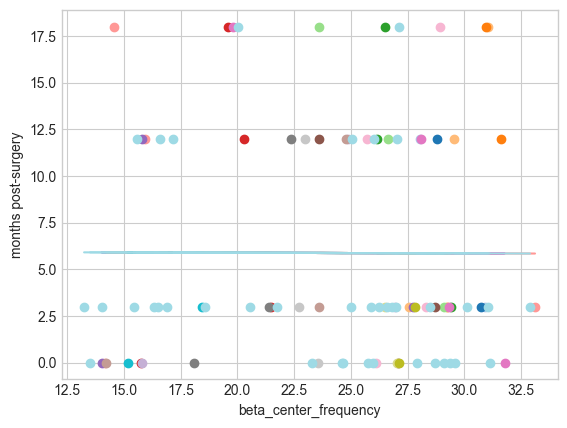

In [83]:
fig = plt.figure()

for group in data_analysis.group.unique():
    sub_data = data_analysis[data_analysis.group==group]

    plt.scatter(sub_data["beta_center_frequency"], sub_data["session"] ,color=plt.cm.tab20(group))
    plt.plot(sub_data["beta_center_frequency"], sub_data["predictions"], color=plt.cm.tab20(group))

plt.ylabel("months post-surgery")
plt.xlabel("beta_center_frequency")

In [27]:
beta_peaks = loadResults.load_fooof_rank_beta_peak_power()
beta_peaks.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,beta_peak_CF_power_bandWidth,beta_center_frequency,beta_peak_power,beta_band_width,rank_beta_power
3,017_Right,fu3m,12,0.075776,0.975321,1.304337,0.703128,"[0.0, 0.0, 0.0, 1e-10, 2e-10, 7e-10, 1.8e-09, ...","[0.7031279556, 0.3104833187, 0.08080093, -0.08...","[0.0, 0.0, 0.0, 0.0, 2e-10, 6e-10, 2e-09, 6.7e...",5,"[29.4862292984, 1.0958098075, 5.0314063169]",29.486229,1.095810,5.031406,1.0
4,017_Right,fu3m,01,0.064701,0.983808,1.540660,1.072680,"[8.3557e-06, 0.0002934974, 0.0064128567, 0.068...","[1.0726801317, 0.6089264433, 0.3388765877, 0.1...","[3.07e-07, 3.13674e-05, 0.0012781982, 0.020770...",6,"[33.2211166882, 0.4390133671, 2.0]",33.221117,0.439013,2.000000,3.0
5,017_Right,fu3m,23,0.065806,0.981375,1.270456,0.586390,"[0.0, 9e-10, 1.81e-08, 3.225e-07, 4.5041e-06, ...","[0.5863896015, 0.2039441538, -0.0197720839, -0...","[0.0, 2e-10, 8.2e-09, 2.112e-07, 3.9175e-06, 5...",6,"[30.781507243, 1.0756834082, 5.0572150049]",30.781507,1.075683,5.057215,2.0
18,017_Right,fu12m,12,0.073584,0.982777,1.530858,1.065401,"[1.4638344481, 2.7473972589, 2.848984725, 0.90...","[1.1169079169, 0.8306240608, 0.6999836468, 0.3...","[0.0515071389, 0.2260573527, 0.3649875886, 0.2...",3,"[28.6375935846, 0.5495840362, 10.4158354341]",28.637594,0.549584,10.415835,2.0
19,017_Right,fu12m,01,0.066650,0.987536,1.878727,1.613434,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.5e-09, 1.293e-07, ...","[1.6134335378, 1.0478803019, 0.7170528667, 0.4...","[0.0, 0.0, 0.0, 0.0, 0.0, 5e-10, 5.29e-08, 3.2...",6,"[28.3105920686, 0.4102618576, 5.5276981195]",28.310592,0.410262,5.527698,3.0


In [28]:
sessions = ["postop", "fu3m", "fu12m", "fu18m"]
channel_group = ["ring", "segm_inter", "segm_intra"]

ring = ['01', '12', '23']
segm_inter = ["1A2A", "1B2B", "1C2C"]
segm_intra = ['1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C']

for group in channel_group:

    if group == "ring":
        ring_df = beta_peaks.loc[beta_peaks.bipolar_channel.isin(ring)]

    elif group == "segm_inter":
        segm_inter_df = beta_peaks.loc[beta_peaks.bipolar_channel.isin(segm_inter)]

    elif group == "segm_intra":
        segm_intra_df = beta_peaks.loc[beta_peaks.bipolar_channel.isin(segm_intra)]

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

segm_intra_df_copy = segm_intra_df.copy()
segm_intra_df_copy["group"] = le.fit_transform(segm_intra_df_copy["subject_hemisphere"])
segm_intra_df_copy = segm_intra_df_copy.dropna()
segm_intra_df_copy["session"] = segm_intra_df_copy.session.replace(to_replace=["postop", "fu3m", "fu12m", "fu18m"], value=[0,3,12,18])

In [14]:
independent_variable = segm_intra_df["beta_center_frequency"]
dependent_variable = segm_intra_df["session"]

random_effect = segm_intra_df["subject_hemisphere"]

In [33]:
md = smf.mixedlm("session ~ beta_center_frequency", data=segm_intra_df_copy, groups="group")
mdf = md.fit()
                

print(mdf.summary())


yp = mdf.fittedvalues
segm_intra_df_copy["predictions"] = yp


             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   session   
No. Observations:     460       Method:               REML      
No. Groups:           30        Scale:                30.6019   
Min. group size:      6         Log-Likelihood:       -1465.8767
Max. group size:      24        Converged:            Yes       
Mean group size:      15.3                                      
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              6.385    1.440  4.434 0.000  3.563  9.207
beta_center_frequency -0.001    0.057 -0.021 0.983 -0.113  0.110
group Var              9.471    0.575                           



In [35]:
segm_intra_df_copy.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,beta_peak_CF_power_bandWidth,beta_center_frequency,beta_peak_power,beta_band_width,rank_beta_power,group,predictions
6,017_Right,3,1A1B,0.061170,0.971942,1.166858,0.443513,"[1.78187e-05, 1.50721e-05, 2.10546e-05, 0.0001...","[0.4435160509, 0.0922593119, -0.1132076002, -0...","[2.7871e-06, 5.293e-06, 1.18671e-05, 0.0001233...",5,"[29.2344251001, 0.4834442273, 2.0]",29.234425,0.483444,2.000000,6.0,1,7.253133
7,017_Right,3,1B1C,0.069114,0.969533,1.188483,0.547959,"[6.9187e-06, 6.4691e-06, 8.3187e-06, 1.20218e-...","[0.5479601583, 0.1901919454, -0.019087644, -0....","[8.508e-07, 1.8132e-06, 3.7751e-06, 7.6794e-06...",6,"[27.6985526641, 0.5786914586, 6.4909643736]",27.698553,0.578691,6.490964,5.0,1,7.254977
8,017_Right,3,1A1C,0.066199,0.963346,1.100582,0.403157,"[3.497e-07, 4.62e-07, 8.088e-07, 1.5562e-06, 3...","[0.4031568259, 0.0718488462, -0.1219536674, -0...","[6e-08, 1.701e-07, 4.651e-07, 1.2283e-06, 3.13...",6,"[28.0061209325, 0.6667053619, 2.0]",28.006121,0.666705,2.000000,4.0,1,7.254608
9,017_Right,3,2A2B,0.065385,0.970130,1.211364,0.448752,"[2.706e-07, 3.939e-07, 7.763e-07, 1.7221e-06, ...","[0.4487517602, 0.0840949096, -0.1292154187, -0...","[4.18e-08, 1.409e-07, 4.54e-07, 1.4269e-06, 9....",5,"[28.2613757014, 0.8861693939, 9.3864257659]",28.261376,0.886169,9.386426,2.0,1,7.254301
10,017_Right,3,2B2C,0.064250,0.975180,1.206573,0.461622,"[0.0109738674, 0.0072278657, 0.0066202639, 0.0...","[0.463265225, 0.1009027437, -0.1103369029, -0....","[0.0016432368, 0.0024953918, 0.0037226871, 0.0...",6,"[29.792500258, 0.8118766471, 3.6365587315]",29.792500,0.811877,3.636559,3.0,1,7.252463


Text(0, 0.5, 'beta peak center frequency')

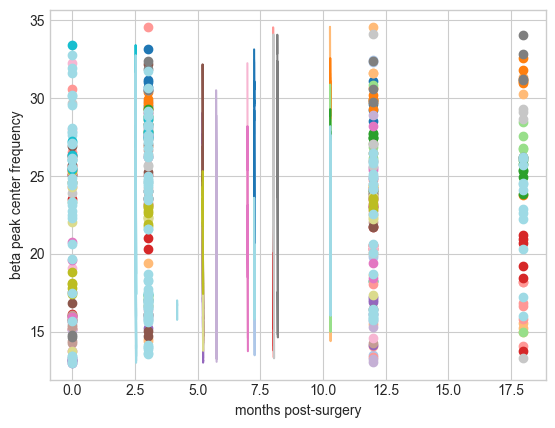

In [39]:
fig = plt.figure()

for group in segm_intra_df_copy.group.unique():
    sub_data = segm_intra_df_copy[segm_intra_df_copy.group==group]

    plt.scatter(sub_data["session"],sub_data["beta_center_frequency"],color=plt.cm.tab20(group), label="_nolegend_")
    plt.plot(sub_data["predictions"],sub_data["beta_center_frequency"],color=plt.cm.tab20(group))

plt.xlabel("months post-surgery")
plt.ylabel("beta peak center frequency")